### Project Description: Targeting Price Elasticity for a Cafe

Price Elasticity of Demand (PED) is a measure of how much the quantity demanded of a product changes in response to a change in its price, assuming all other factors remain constant. Mathematically, it is defined as the percentage change in quantity demanded resulting from a 1% change in price. The formula for price elasticity (E) is:

𝐸
=
%
 Change in Quantity Demanded
%
 Change in Price
E=
% Change in Price
% Change in Quantity Demanded
​



A price elasticity greater than 1 indicates that the product is elastic (demand is highly responsive to price changes), while a value less than 1 indicates it is inelastic (demand is not very responsive to price changes).

This project aims to analyze the Price Elasticity of Demand (PED) for key cafe items—Coke, burgers, lemonade, and coffee—to optimize pricing strategies. Price elasticity measures how demand changes with a 1% change in price, holding all else constant.

Using linear regression (OLS) and machine learning models, we will estimate the elasticity for each item. This analysis will help identify which products can tolerate price changes without significantly impacting sales, enabling the cafe to maximize revenue through strategic pricing.

In [14]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", palette = "deep") # Changed color_code to palette and assigned a valid palette.
import statsmodels.api as sm
from statsmodels.formula.api import ols # Changed stats to statsmodels

In [15]:
# get multiple outputs in teh same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [16]:
## dispaly all rows and columns of dataframe instread of truncated verssion
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

**Loading the Datasets**

In [17]:
sold_df = pd.read_csv('/content/Cafe+-+Sell+Meta+Data.csv')
transaction_df = pd.read_csv('/content/Cafe+-+Transaction+-+Store.csv')
dataInfo_df = pd.read_csv('/content/Cafe+-+DateInfo.csv')

In [18]:
sold_df.head()

SELL_ID  SELL_CATEGORY  ITEM_ID ITEM_NAME
0     1070              0     7821    BURGER
1     3055              0     3052    COFFEE
2     3067              0     5030      COKE
3     3028              0     6249  LEMONADE
4     2051              2     7821    BURGER

In [19]:
sold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SELL_ID        11 non-null     int64 
 1   SELL_CATEGORY  11 non-null     int64 
 2   ITEM_ID        11 non-null     int64 
 3   ITEM_NAME      11 non-null     object
dtypes: int64(3), object(1)
memory usage: 480.0+ bytes




**sell_id**: A numerical variable, an identifier of the combination of items contained in the product.

**sele_category**: Identifies the type of product; 0 identifies a single product, and 2 identifies combo products.

**item_id**: A numerical variable, an identifier of the item contained in the product.

**item_name**: A categorical variable identifying the name of the item.

---


In [20]:
# looking at summary stats for sold
sold_df.describe()

SELL_ID  SELL_CATEGORY      ITEM_ID
count    11.000000      11.000000    11.000000
mean   2235.000000       1.272727  5906.909091
std     598.728653       1.009050  1830.217170
min    1070.000000       0.000000  3052.000000
25%    2051.500000       0.000000  5030.000000
50%    2053.000000       2.000000  6249.000000
75%    2540.500000       2.000000  7821.000000
max    3067.000000       2.000000  7821.000000

In [21]:
# look at categorical summary
sold_df.describe(include='object')

ITEM_NAME
count         11
unique         4
top       BURGER
freq           4

### Univariate Analysis



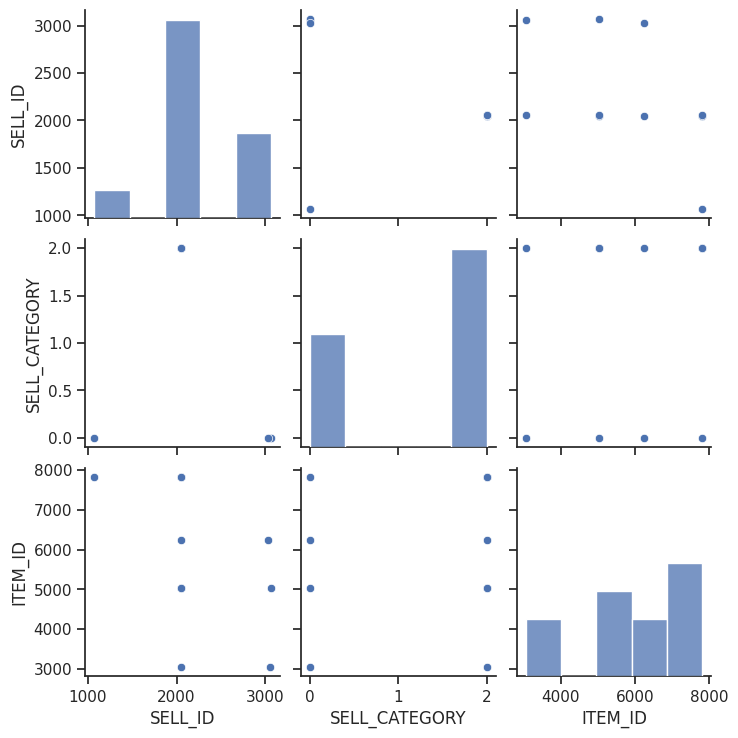

In [22]:
sns.pairplot(sold_df)

Since its mainly ids and sell category not too much to look at

**Looking at the transaction data**

In [23]:
transaction_df.head()

CALENDAR_DATE  PRICE  QUANTITY  SELL_ID  SELL_CATEGORY
0      01/01/12  15.50        46     1070              0
1      01/01/12  12.73        22     2051              2
2      01/01/12  12.75        18     2052              2
3      01/01/12  12.60        30     2053              2
4      01/02/12  15.50        70     1070              0

In [24]:
# look for nulls and data type
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5404 entries, 0 to 5403
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CALENDAR_DATE  5404 non-null   object 
 1   PRICE          5404 non-null   float64
 2   QUANTITY       5404 non-null   int64  
 3   SELL_ID        5404 non-null   int64  
 4   SELL_CATEGORY  5404 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 211.2+ KB


**insights**

No nulls
5400 records
5 columns

In [25]:
# summary stats for numerical columns
transaction_df.describe()

PRICE     QUANTITY     SELL_ID  SELL_CATEGORY
count  5404.000000  5404.000000  5404.00000    5404.000000
mean     12.868729    44.335307  1806.50000       1.500000
std       1.563922    25.502597   425.25841       0.866106
min      10.120000     8.000000  1070.00000       0.000000
25%      11.530000    24.000000  1805.75000       1.500000
50%      12.640000    36.000000  2051.50000       2.000000
75%      13.557500    60.000000  2052.25000       2.000000
max      16.500000   124.000000  2053.00000       2.000000

**Insights**
Price mean and medium very close to each other

Qty mean and medium differs by 20

**Transaction Data Summary**

price: A numerical variable associated with the price of the product identified by sell_id.

qtl: A numerical variable associated with the quantity of the product sold, identified by sell_id.

sell_id: A numerical variable identifying the product sold.

sell_category: A numerical variable representing the category of the product sold.



### Univariate Analysis for Transaction df


(array([ 360.,  509.,  629., 1351., 1082.,  122.,  389.,  240.,  482.,
         240.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <BarContainer object of 10 artists>)

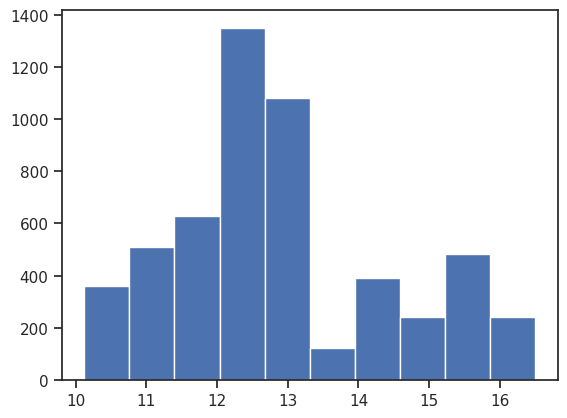

In [26]:
plt.hist(transaction_df['PRICE'])

**Insights**

The distribution appears to be somewhat right-skewed, with a peak around the value of 12, where the frequency is the highest, reaching over 1,200. The frequency decreases on either side of this peak, with fewer observations as the price moves towards 10 or beyond 13. The histogram indicates that most prices are concentrated around 12 and 13, with a noticeable decline in frequency for prices lower than 11 or higher than 15.

(array([ 543., 1729.,  915.,  646.,  506.,  192.,  392.,  341.,  108.,
          32.]),
 array([  8. ,  19.6,  31.2,  42.8,  54.4,  66. ,  77.6,  89.2, 100.8,
        112.4, 124. ]),
 <BarContainer object of 10 artists>)

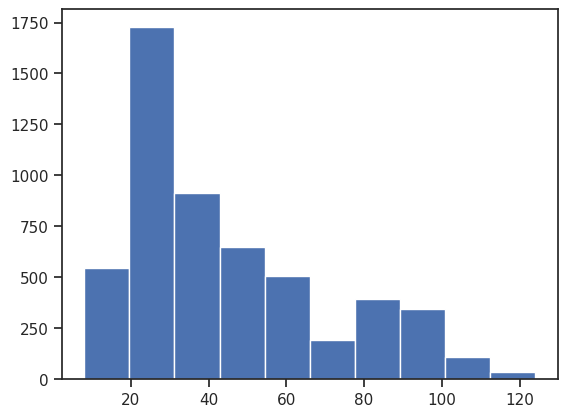

In [27]:
plt.hist(transaction_df['QUANTITY'])

**Insights**

QTY has a right-skewed distribution. The highest frequency occurs in the first few bins, indicating that most data points fall within the lower range (around 20 to 40). The frequency decreases as the values increase, with very few data points beyond 100.

{'whiskers': [<matplotlib.lines.Line2D at 0x7d647c1945b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d647c194af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d647c194310>],
 'medians': [<matplotlib.lines.Line2D at 0x7d647c195030>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d647c1952d0>],
 'means': []}

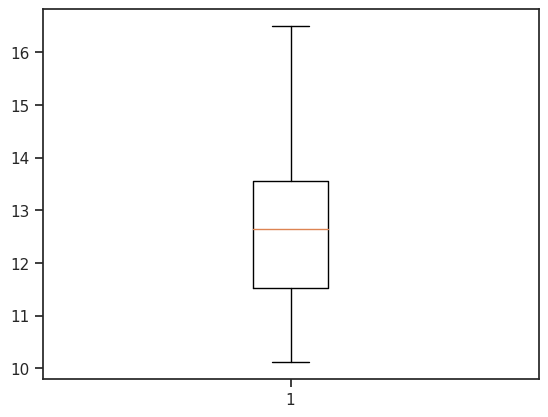

In [28]:
plt.boxplot(transaction_df['PRICE'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7d647c1e7ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d647c020220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d647c1e7a30>],
 'medians': [<matplotlib.lines.Line2D at 0x7d647c020760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d647c020a00>],
 'means': []}

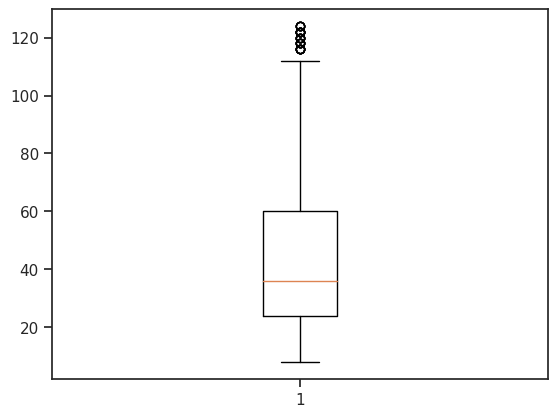

In [29]:
plt.boxplot(transaction_df['QUANTITY'])

**QTY Insights**

The boxplot indicates a median value around 40, with the interquartile range (IQR) extending from approximately 25 to 60. There are several outliers above the upper whisker, which extends to around 100, with outliers reaching up to about 120. The lower whisker extends to around 10, suggesting that the majority of the data points are within the 10 to 100 range, with a few higher values considered outliers. This suggests a right-skewed distribution with a moderate spread in the data.

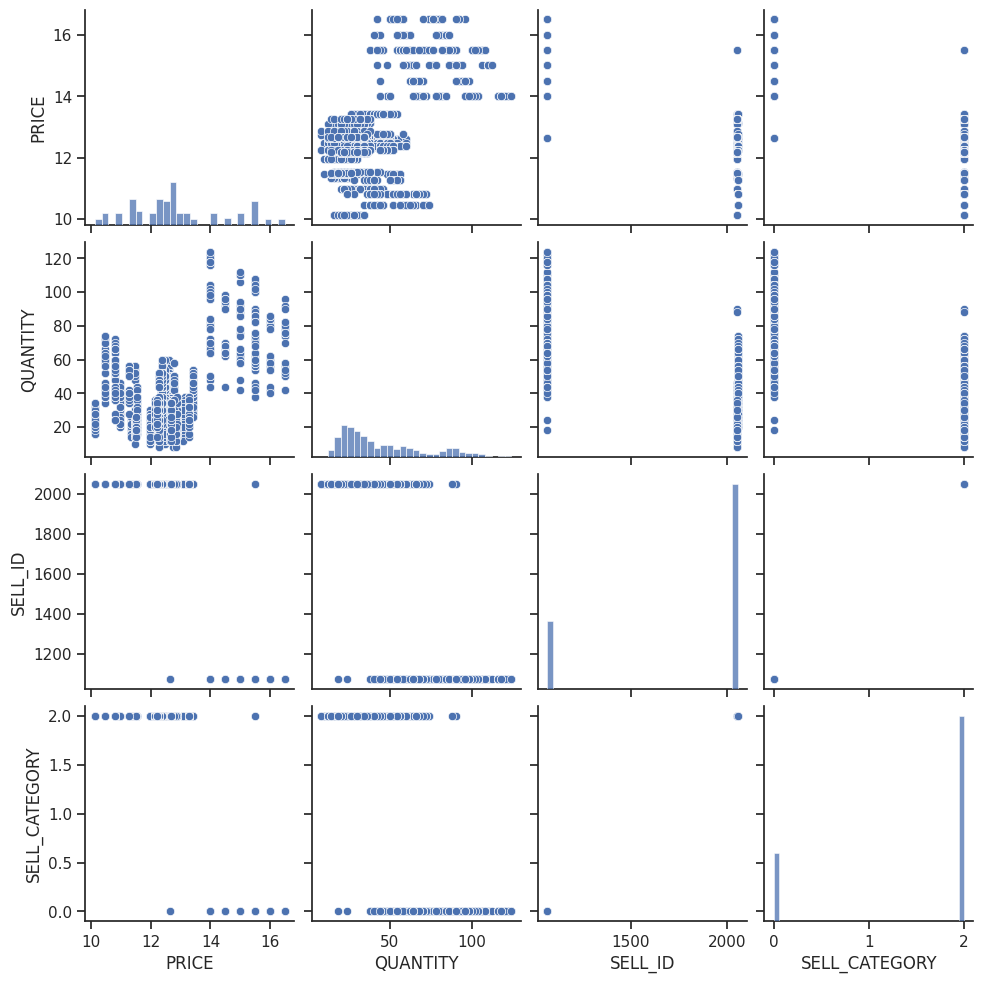

In [30]:
sns.pairplot(transaction_df)

**Bivariate Analysis Transaction**

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

Text(0.5, 1.0, 'Scatter Plot of Price vs Quantity')

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Quantity')

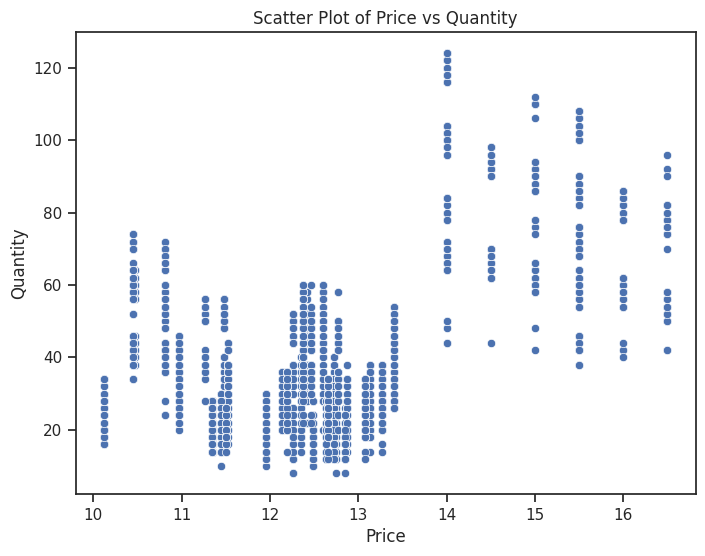

In [31]:
#: scatter plot  price and qtl

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PRICE', y='QUANTITY', data=transaction_df)
plt.title('Scatter Plot of Price vs Quantity')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.show()


**Insights**

The plot shows that most data points are concentrated between prices of 10 and 13, with quantities varying widely up to around 60. As the price increases beyond 13, there appears to be a larger spread in quantities, reaching up to around 120. There are more observations with higher quantities at prices around 14 to 16. Overall, the scatter plot suggests that higher prices tend to correspond with a broader range of quantities, including several high-quantity outliers.

**date_info**

In [32]:
dataInfo_df.head()

CALENDAR_DATE  YEAR   HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  \
0        1/1/12  2012  New Year           1               0   
1        1/2/12  2012  New Year           0               0   
2        1/3/12  2012  New Year           0               0   
3        1/4/12  2012       NaN           0               0   
4        1/5/12  2012       NaN           0               0   

   AVERAGE_TEMPERATURE  IS_OUTDOOR  
0                 24.8           0  
1                 24.8           0  
2                 32.0           1  
3                 32.0           1  
4                 24.8           0

In [33]:
dataInfo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CALENDAR_DATE        1349 non-null   object 
 1   YEAR                 1349 non-null   int64  
 2   HOLIDAY              105 non-null    object 
 3   IS_WEEKEND           1349 non-null   int64  
 4   IS_SCHOOLBREAK       1349 non-null   int64  
 5   AVERAGE_TEMPERATURE  1349 non-null   float64
 6   IS_OUTDOOR           1349 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 73.9+ KB


Holiday has mainly nulls
the rest of the features do not have nuls

In [34]:
# look at nulls
dataInfo_df.isnull().sum()

CALENDAR_DATE             0
YEAR                      0
HOLIDAY                1244
IS_WEEKEND                0
IS_SCHOOLBREAK            0
AVERAGE_TEMPERATURE       0
IS_OUTDOOR                0
dtype: int64

In [35]:
# summary stats for numerical columns
dataInfo_df.describe()

YEAR   IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  \
count  1349.000000  1349.000000     1349.000000          1349.000000   
mean   2013.375093     0.285397        0.204596            56.326019   
std       1.073073     0.451771        0.403556            20.227597   
min    2012.000000     0.000000        0.000000            14.000000   
25%    2012.000000     0.000000        0.000000            35.600000   
50%    2013.000000     0.000000        0.000000            60.800000   
75%    2014.000000     1.000000        0.000000            75.200000   
max    2015.000000     1.000000        1.000000            87.800000   

        IS_OUTDOOR  
count  1349.000000  
mean      0.862120  
std       0.344902  
min       0.000000  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

In [36]:
# replace the nulls for holliday with "No holiday since blank probably means it was not a hilliday
dataInfo_df['HOLIDAY'].fillna('No Holiday', inplace=True)

In [37]:
# summary stats for categorical columns
dataInfo_df.describe(include='object')

CALENDAR_DATE     HOLIDAY
count           1349        1349
unique          1348           9
top           3/1/13  No Holiday
freq               2        1244

In [38]:
dataInfo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CALENDAR_DATE        1349 non-null   object 
 1   YEAR                 1349 non-null   int64  
 2   HOLIDAY              1349 non-null   object 
 3   IS_WEEKEND           1349 non-null   int64  
 4   IS_SCHOOLBREAK       1349 non-null   int64  
 5   AVERAGE_TEMPERATURE  1349 non-null   float64
 6   IS_OUTDOOR           1349 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 73.9+ KB


**Univariant and bivariant on date_df**

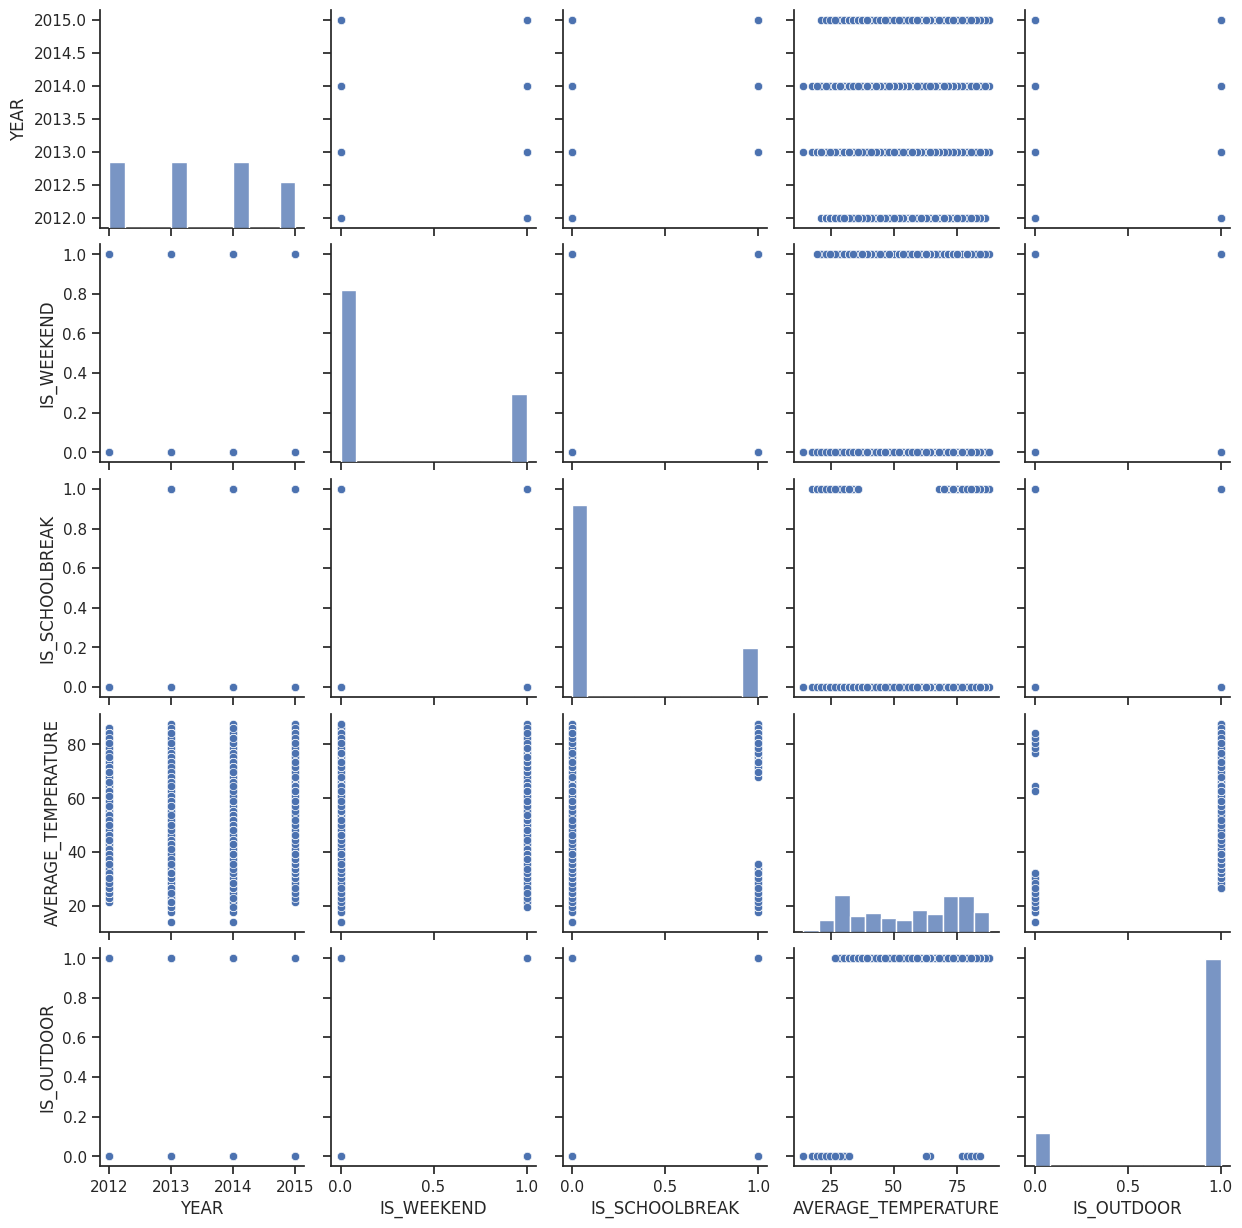

In [39]:
sns.pairplot(dataInfo_df)

### Looking at the data more


In [40]:
np.unique(dataInfo_df['HOLIDAY'])

array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year',
       'Mid-Autumn Day', 'National Day', 'New Year', 'No Holiday',
       'Qing Ming Festival', 'WWII Celebration'], dtype=object)

In [41]:
dataInfo_df['CALENDAR_DATE'].min()

'1/1/12'

In [42]:
dataInfo_df['CALENDAR_DATE'].max()

'9/9/15'

from Jan, 2012 - Sept,2015

In [43]:
dataInfo_df.shape

(1349, 7)

In [44]:
dataInfo_df[dataInfo_df.isnull().any(axis=1)] # Changed 'axist' to 'axis'


Empty DataFrame
Columns: [CALENDAR_DATE, YEAR, HOLIDAY, IS_WEEKEND, IS_SCHOOLBREAK, AVERAGE_TEMPERATURE, IS_OUTDOOR]
Index: []

In [45]:
pd.concat([sold_df.SELL_ID, pd.get_dummies(sold_df.ITEM_NAME)], axis=1)

SELL_ID  BURGER  COFFEE   COKE  LEMONADE
0      1070    True   False  False     False
1      3055   False    True  False     False
2      3067   False   False   True     False
3      3028   False   False  False      True
4      2051    True   False  False     False
5      2051   False   False   True     False
6      2052    True   False  False     False
7      2052   False   False  False      True
8      2053    True   False  False     False
9      2053   False   False   True     False
10     2053   False    True  False     False

In [46]:
pd.concat([sold_df.SELL_ID, pd.get_dummies(sold_df.ITEM_NAME)], axis=1).groupby('SELL_ID').sum()

BURGER  COFFEE  COKE  LEMONADE
SELL_ID                                
1070          1       0     0         0
2051          1       0     1         0
2052          1       0     0         1
2053          1       1     1         0
3028          0       0     0         1
3055          0       1     0         0
3067          0       0     1         0

In [47]:
foodData = pd.merge(sold_df.drop('ITEM_ID', axis=1), transaction_df.drop('SELL_CATEGORY', axis=1), on='SELL_ID')
foodData.head(20)

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY
0      1070              0    BURGER      01/01/12   15.5        46
1      1070              0    BURGER      01/02/12   15.5        70
2      1070              0    BURGER      01/03/12   15.5        62
3      1070              0    BURGER      01/04/12   15.5        88
4      1070              0    BURGER      01/05/12   15.5       104
5      1070              0    BURGER      01/06/12   15.5       100
6      1070              0    BURGER      01/07/12   15.5        70
7      1070              0    BURGER      01/08/12   15.5        70
8      1070              0    BURGER      01/09/12   15.5       106
9      1070              0    BURGER      01/10/12   15.5       108
10     1070              0    BURGER      01/11/12   15.5       104
11     1070              0    BURGER      01/12/12   15.5       102
12     1070              0    BURGER       1/13/12   15.5       100
13     1070              0    BURGER       1/14/12   15.5        74
14     1070              0    BURGER       1/15/12   15.5        60
15     1070              0    BURGER       1/16/12   15.5       104
16     1070              0    BURGER       1/17/12   15.5       106
17     1070              0    BURGER       1/18/12   15.5       108
18     1070              0    BURGER       1/19/12   15.5       100
19     1070              0    BURGER       1/20/12   15.5       100

In [48]:
groupBy = foodData.groupby(['SELL_ID','SELL_CATEGORY', 'ITEM_NAME','CALENDAR_DATE', 'PRICE']).sum()

In [49]:
groupBy

QUANTITY
SELL_ID SELL_CATEGORY ITEM_NAME CALENDAR_DATE PRICE          
1070    0             BURGER    01/01/12      15.50        46
                                01/01/13      15.50        60
                                01/01/14      15.50        72
                                01/01/15      14.00        66
                                01/02/12      15.50        70
                                01/02/13      15.50        68
                                01/02/14      15.50        76
                                01/02/15      14.00       102
                                01/03/12      15.50        62
                                01/03/13      15.50        70
                                01/03/14      15.50        68
                                01/03/15      14.00        68
                                01/04/12      15.50        88
                                01/04/13      15.50       100
                                01/04/14      15.50        74
                                01/04/15      14.00        70
                                01/05/12      15.50       104
                                01/05/13      15.50        68
                                01/05/14      15.50        70
                                01/05/15      14.00       104
                                01/06/12      15.50       100
                                01/06/13      15.50        72
                                01/06/14      15.50       108
                                01/06/15      14.00        98
                                01/07/12      15.50        70
                                01/07/13      15.50       100
                                01/07/14      15.50       100
                                01/07/15      14.00       104
                                01/08/12      15.50        70
                                01/08/13      15.50       100
                                01/08/14      15.50       104
                                01/08/15      14.00       120
                                01/09/12      15.50       106
                                01/09/13      15.50       102
                                01/09/14      15.50       102
                                01/09/15      14.00       124
                                01/10/12      15.50       108
                                01/10/13      15.50       104
                                01/10/14      15.50       102
                                01/10/15      14.00        80
                                01/11/12      15.50       104
                                01/11/13      15.50       102
                                01/11/14      15.50        76
                                01/11/15      14.00        72
                                01/12/12      15.50       102
                                01/12/13      15.50        74
                                01/12/14      15.50        76
                                01/12/15      14.00       122
                                02/01/12      15.50        90
                                02/01/13      15.50       102
                                02/01/14      15.50        72
                                02/01/15      14.00        44
                                02/02/12      15.50        64
                                02/02/13      15.50        70
                                02/02/14      15.50        74
                                02/02/15      14.00        68
                                02/03/12      15.50        62
                                02/03/13      15.50        74
                                02/03/14      15.50        88
                                02/03/15      14.00        84
                                02/04/12      15.50        42
                                02/04/13      15.50       104
                                02/04/14      15.50       106
                       

In [50]:
foodData.shape
intermediate_data = groupBy.reset_index()

(10808, 6)

In [51]:
groupBy.shape

(10792, 1)

In [52]:
intermediate_data.head()

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY
0     1070              0    BURGER      01/01/12   15.5        46
1     1070              0    BURGER      01/01/13   15.5        60
2     1070              0    BURGER      01/01/14   15.5        72
3     1070              0    BURGER      01/01/15   14.0        66
4     1070              0    BURGER      01/02/12   15.5        70

In [53]:
# see if dates changed
intermediate_data['CALENDAR_DATE'].min()
intermediate_data['CALENDAR_DATE'].max()

'01/01/12'

'9/30/14'

We lost year 2015.  
we have around 2 years and 9 months of data which is fine for training


In [54]:
combine_data = pd.merge(intermediate_data, dataInfo_df, on='CALENDAR_DATE')
combine_data.head()

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
0     1070              0    BURGER       1/13/12  15.50       100  2012   
1     2051              2    BURGER       1/13/12  12.73        40  2012   
2     2051              2      COKE       1/13/12  12.73        40  2012   
3     2052              2    BURGER       1/13/12  12.75        26  2012   
4     2052              2  LEMONADE       1/13/12  12.75        26  2012   

      HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
0  No Holiday           0               0                 26.6           0  
1  No Holiday           0               0                 26.6           0  
2  No Holiday           0               0                 26.6           0  
3  No Holiday           0               0                 26.6           0  
4  No Holiday           0               0                 26.6           0

In [55]:
# check for nulls
combine_data.isnull().sum()

SELL_ID                0
SELL_CATEGORY          0
ITEM_NAME              0
CALENDAR_DATE          0
PRICE                  0
QUANTITY               0
YEAR                   0
HOLIDAY                0
IS_WEEKEND             0
IS_SCHOOLBREAK         0
AVERAGE_TEMPERATURE    0
IS_OUTDOOR             0
dtype: int64

after combining all 3 tables; no nulls

In [56]:
combine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6696 entries, 0 to 6695
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SELL_ID              6696 non-null   int64  
 1   SELL_CATEGORY        6696 non-null   int64  
 2   ITEM_NAME            6696 non-null   object 
 3   CALENDAR_DATE        6696 non-null   object 
 4   PRICE                6696 non-null   float64
 5   QUANTITY             6696 non-null   int64  
 6   YEAR                 6696 non-null   int64  
 7   HOLIDAY              6696 non-null   object 
 8   IS_WEEKEND           6696 non-null   int64  
 9   IS_SCHOOLBREAK       6696 non-null   int64  
 10  AVERAGE_TEMPERATURE  6696 non-null   float64
 11  IS_OUTDOOR           6696 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 627.9+ KB


In [57]:
# check unique
np.unique(combine_data['HOLIDAY'])
np.unique(combine_data['IS_WEEKEND'])
np.unique(combine_data['IS_SCHOOLBREAK'])


array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year',
       'Mid-Autumn Day', 'No Holiday'], dtype=object)

array([0, 1])

array([0, 1])

In [58]:
# summary stats
combine_data.describe()

SELL_ID  SELL_CATEGORY        PRICE     QUANTITY         YEAR  \
count  6696.000000    6696.000000  6696.000000  6696.000000  6696.000000   
mean   1929.375000       1.750000    12.456062    40.488949  2013.351254   
std     324.838411       0.661487     1.333201    21.112237     1.062487   
min    1070.000000       0.000000    10.120000     8.000000  2012.000000   
25%    2051.000000       2.000000    11.480000    24.000000  2012.000000   
50%    2052.000000       2.000000    12.460000    34.000000  2013.000000   
75%    2053.000000       2.000000    12.850000    50.000000  2014.000000   
max    2053.000000       2.000000    16.500000   124.000000  2015.000000   

        IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE   IS_OUTDOOR  
count  6696.000000     6696.000000          6696.000000  6696.000000  
mean      0.284349        0.200717            56.255914     0.878136  
std       0.451137        0.400567            19.994855     0.327153  
min       0.000000        0.000000            14.000000     0.000000  
25%       0.000000        0.000000            35.600000     1.000000  
50%       0.000000        0.000000            59.000000     1.000000  
75%       1.000000        0.000000            75.200000     1.000000  
max       1.000000        1.000000            87.800000     1.000000

### Data Exploration on combine dataframe


In [59]:
#  a new columns for revenue

combine_data['REVENUE'] = combine_data['PRICE'] * combine_data['QUANTITY']


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='HOLIDAY', ylabel='PRICE'>

Text(0.5, 1.0, 'Price by Holiday')

Text(0.5, 0, 'Holiday')

Text(0, 0.5, 'Price')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'No Holiday'),
  Text(1, 0, 'Luner New Year'),
  Text(2, 0, 'Labor Day'),
  Text(3, 0, 'Dragon Boat Festivel'),
  Text(4, 0, 'Mid-Autumn Day')])

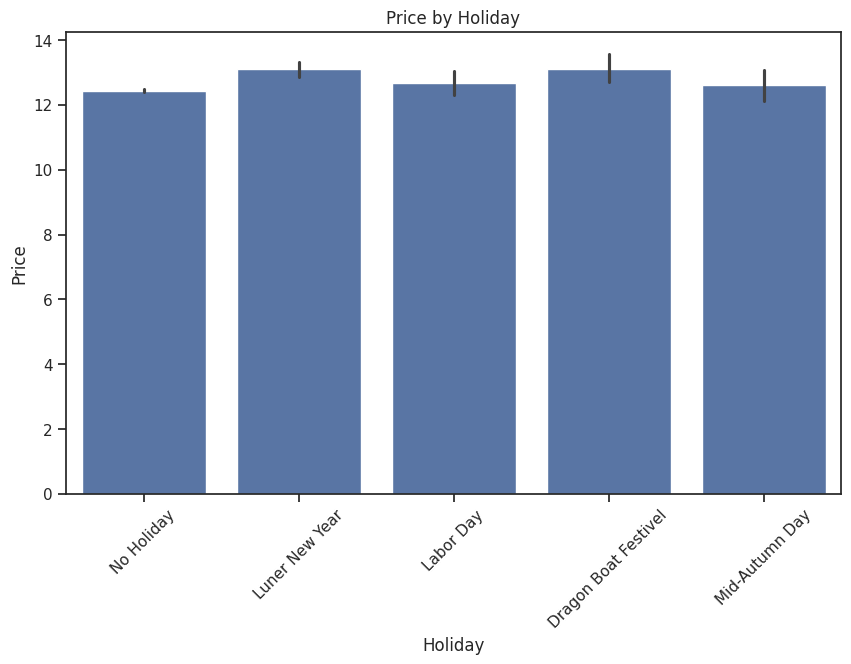

In [60]:
#  bar chart for price by holliday

plt.figure(figsize=(10, 6))
sns.barplot(x='HOLIDAY', y='PRICE', data=combine_data)
plt.title('Price by Holiday')
plt.xlabel('Holiday')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='HOLIDAY', ylabel='QUANTITY'>

Text(0.5, 1.0, 'Quantity by Holiday')

Text(0.5, 0, 'Holiday')

Text(0, 0.5, 'Quantity')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'No Holiday'),
  Text(1, 0, 'Luner New Year'),
  Text(2, 0, 'Labor Day'),
  Text(3, 0, 'Dragon Boat Festivel'),
  Text(4, 0, 'Mid-Autumn Day')])

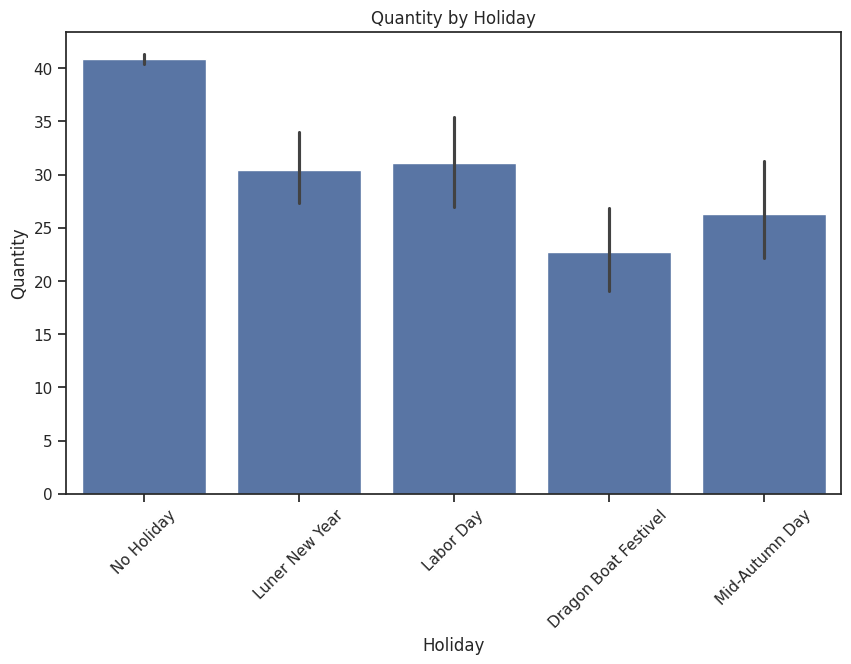

In [61]:
# chart qty by holliday

plt.figure(figsize=(10, 6))
sns.barplot(x='HOLIDAY', y='QUANTITY', data=combine_data)
plt.title('Quantity by Holiday')
plt.xlabel('Holiday')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='IS_WEEKEND', ylabel='QUANTITY'>

Text(0.5, 1.0, 'Quantity by Weekend')

Text(0.5, 0, 'Weekend')

Text(0, 0.5, 'Quantity')

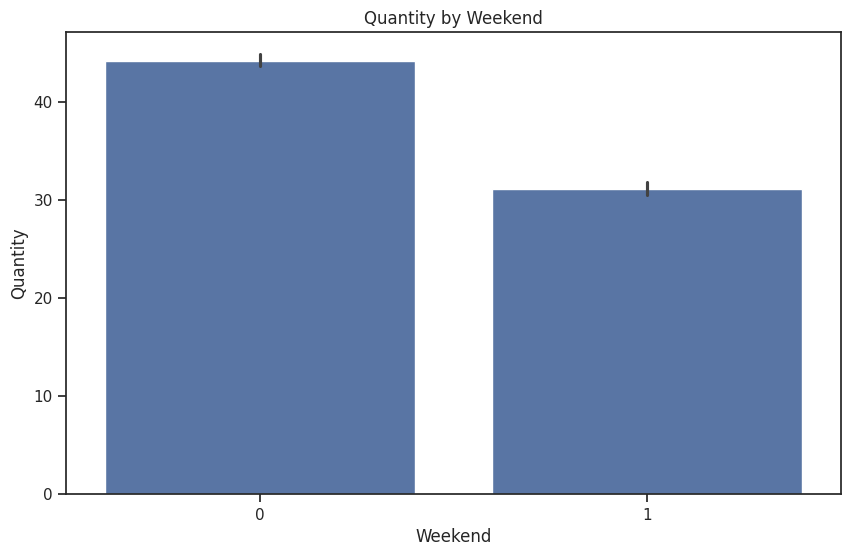

In [62]:
#  plot qty by is weekend

plt.figure(figsize=(10, 6))
sns.barplot(x='IS_WEEKEND', y='QUANTITY', data=combine_data)
plt.title('Quantity by Weekend')
plt.xlabel('Weekend')
plt.ylabel('Quantity')
plt.show()


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='IS_WEEKEND', ylabel='REVENUE'>

Text(0.5, 1.0, 'Revenue by Weekend')

Text(0.5, 0, 'Weekend')

Text(0, 0.5, 'Revenue')

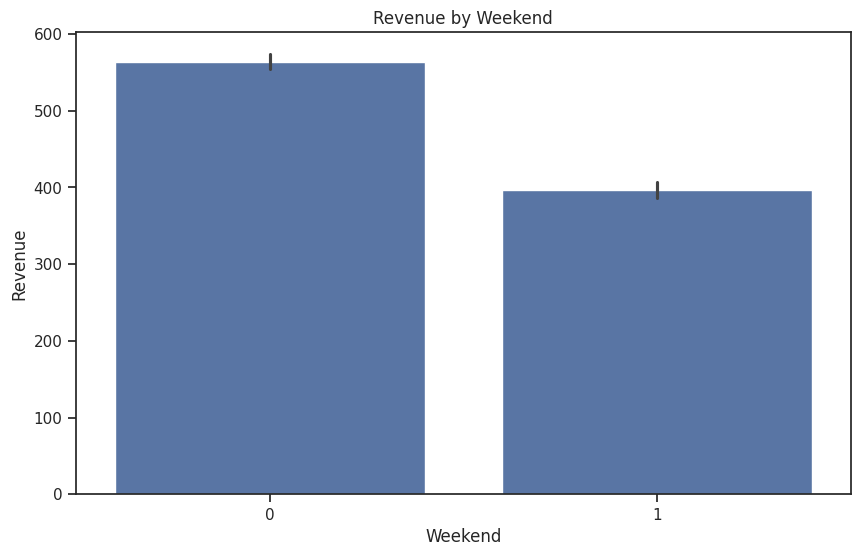

In [63]:
#  plot revenue by is weekend

# plot revenue by is weekend
plt.figure(figsize=(10, 6))
sns.barplot(x='IS_WEEKEND', y='REVENUE', data=combine_data)
plt.title('Revenue by Weekend')
plt.xlabel('Weekend')
plt.ylabel('Revenue')
plt.show()


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='IS_SCHOOLBREAK', ylabel='QUANTITY'>

Text(0.5, 1.0, 'Quantity by School Break')

Text(0.5, 0, 'School Break')

Text(0, 0.5, 'Quantity')

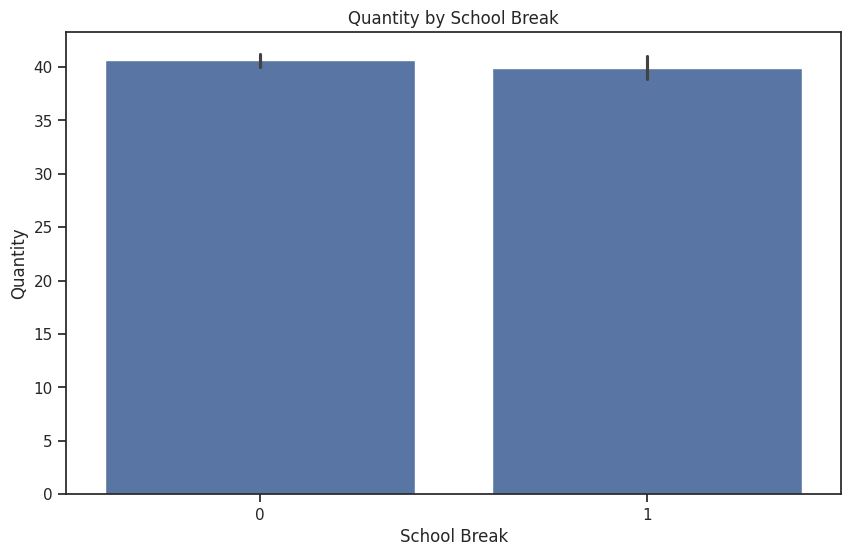

In [64]:
#  plot qty by is school break

# plot qty by is school break
plt.figure(figsize=(10, 6))
sns.barplot(x='IS_SCHOOLBREAK', y='QUANTITY', data=combine_data)
plt.title('Quantity by School Break')
plt.xlabel('School Break')
plt.ylabel('Quantity')
plt.show()


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='TEMP_BINS', ylabel='QUANTITY'>

Text(0.5, 1.0, 'Quantity by Temperature Bins')

Text(0.5, 0, 'Temperature Bins')

Text(0, 0.5, 'Quantity')

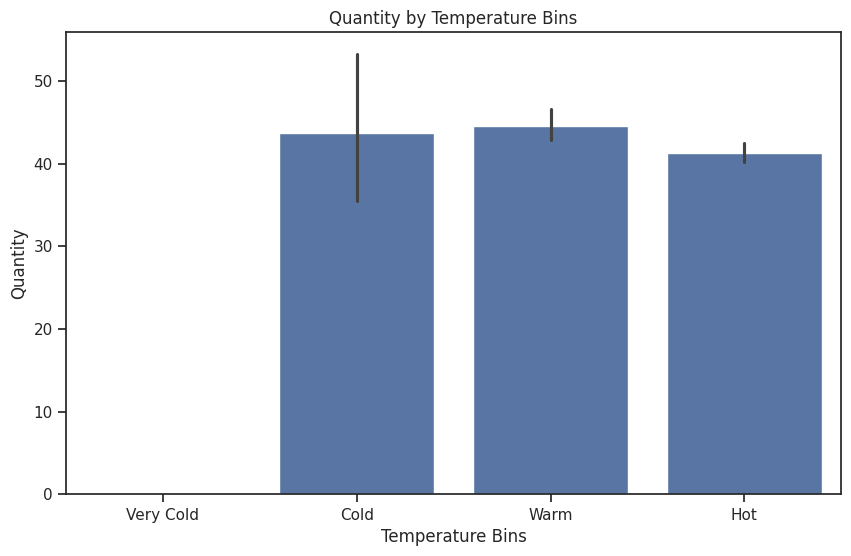

In [65]:
# prompt: qty by temp update for bins

# Create bins for temperature
combine_data['TEMP_BINS'] = pd.cut(combine_data['AVERAGE_TEMPERATURE'], bins=[-10, 10, 20, 30, 40], labels=['Very Cold', 'Cold', 'Warm', 'Hot'])

# Plot quantity by temperature bins
plt.figure(figsize=(10, 6))
sns.barplot(x='TEMP_BINS', y='QUANTITY', data=combine_data)
plt.title('Quantity by Temperature Bins')
plt.xlabel('Temperature Bins')
plt.ylabel('Quantity')
plt.show()


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='QUANTITY', ylabel='REVENUE'>

Text(0.5, 1.0, 'Revenue by Quantity')

Text(0.5, 0, 'Quantity')

Text(0, 0.5, 'Revenue')

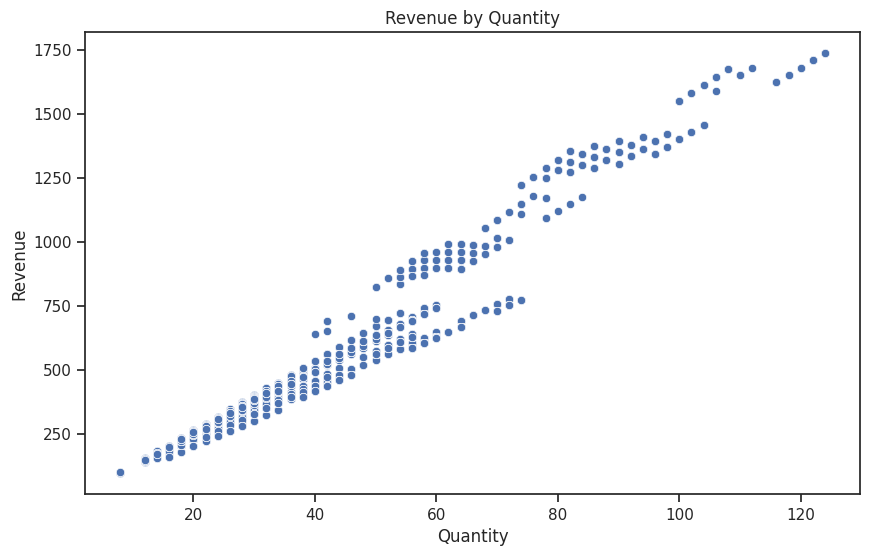

In [66]:
# prompt: plot revenue by qty

# plot revenue by qty
plt.figure(figsize=(10, 6))
sns.scatterplot(x='QUANTITY', y='REVENUE', data=combine_data)
plt.title('Revenue by Quantity')
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.show()


### Creating Business as Usual dataframe and completing EDA

In [67]:
# business as usual - bau
bau = combine_data[(combine_data['HOLIDAY'] == 'No Holiday') & (combine_data['IS_WEEKEND'] == 0) & (combine_data['IS_SCHOOLBREAK'] == 0)]


In [68]:
bau.head(10)

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
0      1070              0    BURGER       1/13/12  15.50       100  2012   
1      2051              2    BURGER       1/13/12  12.73        40  2012   
2      2051              2      COKE       1/13/12  12.73        40  2012   
3      2052              2    BURGER       1/13/12  12.75        26  2012   
4      2052              2  LEMONADE       1/13/12  12.75        26  2012   
5      2053              2    BURGER       1/13/12  12.60        58  2012   
6      2053              2    COFFEE       1/13/12  12.60        58  2012   
7      2053              2      COKE       1/13/12  12.60        58  2012   
16     1070              0    BURGER       1/13/14  15.50       104  2014   
17     2051              2    BURGER       1/13/14  13.27        38  2014   

       HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  \
0   No Holiday           0               0                 26.6           0   
1   No Holiday           0               0                 26.6           0   
2   No Holiday           0               0                 26.6           0   
3   No Holiday           0               0                 26.6           0   
4   No Holiday           0               0                 26.6           0   
5   No Holiday           0               0                 26.6           0   
6   No Holiday           0               0                 26.6           0   
7   No Holiday           0               0                 26.6           0   
16  No Holiday           0               0                 28.4           0   
17  No Holiday           0               0                 28.4           0   

    REVENUE TEMP_BINS  
0   1550.00      Warm  
1    509.20      Warm  
2    509.20      Warm  
3    331.50      Warm  
4    331.50      Warm  
5    730.80      Warm  
6    730.80      Warm  
7    730.80      Warm  
16  1612.00      Warm  
17   504.26      Warm

### Data Exploration on bau dataframe

In [69]:
np.unique(bau['HOLIDAY'])
np.unique(bau['IS_WEEKEND'])
np.unique(bau['IS_SCHOOLBREAK'])

array(['No Holiday'], dtype=object)

array([0])

array([0])

In [70]:
bau.shape

(3768, 14)

(array([1884.,    0.,    0.,  942.,    0.,    0.,  471.,    0.,    0.,
         471.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

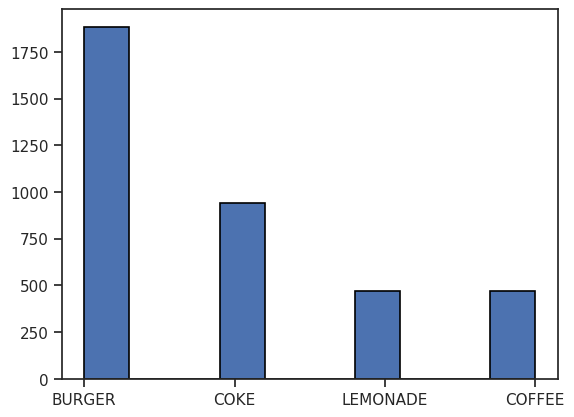

In [71]:
# prompt: update to be linear graident; plt.hist(bau.ITEM_NAME)

plt.hist(bau.ITEM_NAME, edgecolor='black', linewidth=1.2)


Burgers has the highest next to coke

(array([ 411.,  388.,  441., 1159.,  790.,  108.,  122.,  111.,  174.,
          64.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <BarContainer object of 10 artists>)

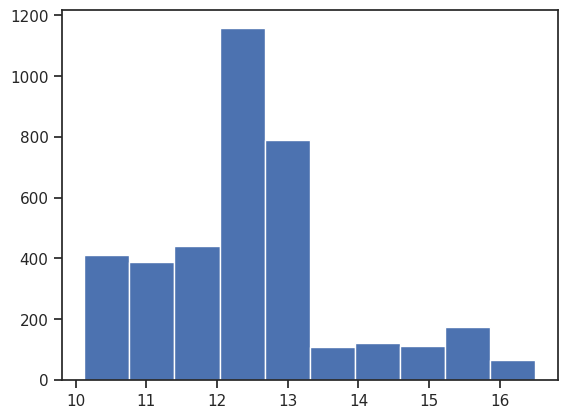

In [72]:
plt.hist(bau.PRICE)

 price peaks from 12-13 and then drops

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Quantity')

Text(0.5, 1.0, 'Price vs Quantity')

<function matplotlib.pyplot.show(close=None, block=None)>

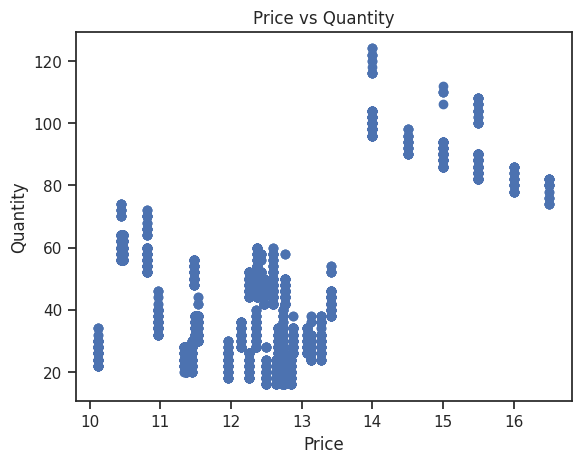

In [73]:
# compare price and qty
plt.scatter(bau['PRICE'], bau['QUANTITY'])
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Price vs Quantity')
plt.show

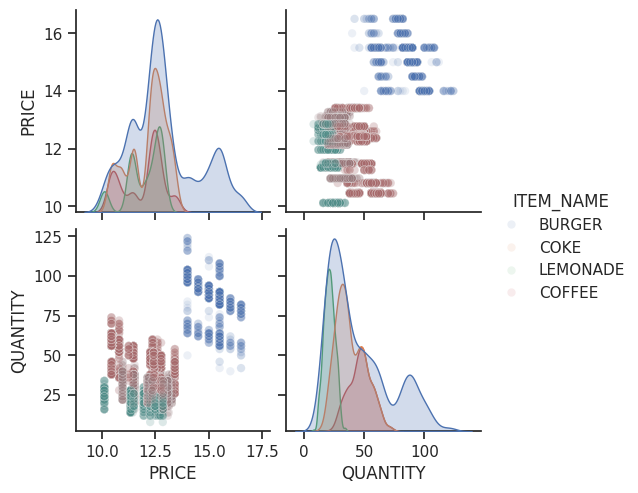

In [74]:
sns.pairplot(combine_data[['PRICE','QUANTITY','ITEM_NAME']], hue = 'ITEM_NAME', plot_kws={'alpha':0.1}) # Changed 'QUANTItY' to 'QUANTITY'

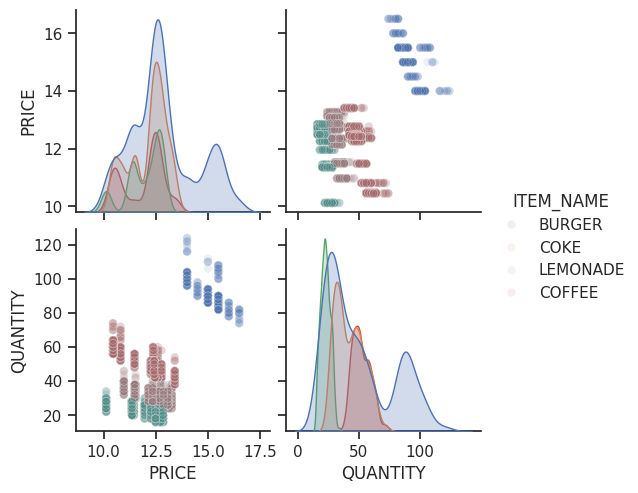

In [75]:
sns.pairplot(bau[['PRICE','QUANTITY','ITEM_NAME']], hue = 'ITEM_NAME', plot_kws={'alpha':0.1})

We can see there is less clustters in the upper right because the weeend and hollidays been removed.  this is more cleaner to read

**Insights**

Price Distribution: Most items (Burger, Coke, Lemonade, Coffee) have prices concentrated between 10 and 13. However, Burger and Coke show a more pronounced peak around these values, while Lemonade and Coffee have a broader spread with secondary peaks.

Quantity Distribution: The quantities sold are mostly clustered below 60, with some items (such as Burger) showing higher maximum quantities reaching up to around 120. Lemonade has lower quantities, while Burger shows more variability in quantity sold.

Item Comparison: Burgers tend to have a wider range of both prices and quantities compared to other items, indicating higher variability in both attributes. Coke and Coffee have relatively consistent quantities at specific price ranges, while Lemonade appears less frequently sold in larger quantities.

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
0     1070              0    BURGER       1/13/12  15.50       100  2012   
1     2051              2    BURGER       1/13/12  12.73        40  2012   
3     2052              2    BURGER       1/13/12  12.75        26  2012   
5     2053              2    BURGER       1/13/12  12.60        58  2012   
8     1070              0    BURGER       1/13/13  15.50        70  2013   

      HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  \
0  No Holiday           0               0                 26.6           0   
1  No Holiday           0               0                 26.6           0   
3  No Holiday           0               0                 26.6           0   
5  No Holiday           0               0                 26.6           0   
8  No Holiday           1               0                 30.2           0   

   REVENUE TEMP_BINS  
0   1550.0      Warm  
1    509.2      Warm  
3    331.5      Warm  
5    730.8      Warm  
8   1085.0       Hot

(3348, 14)

SELL_ID  SELL_CATEGORY        PRICE     QUANTITY         YEAR  \
count  3348.000000    3348.000000  3348.000000  3348.000000  3348.000000   
mean   1806.500000       1.500000    12.858572    44.974313  2013.351254   
std     425.282579       0.866155     1.565046    25.747886     1.062567   
min    1070.000000       0.000000    10.120000     8.000000  2012.000000   
25%    1805.750000       1.500000    11.530000    24.000000  2012.000000   
50%    2051.500000       2.000000    12.640000    36.000000  2013.000000   
75%    2052.250000       2.000000    13.557500    60.000000  2014.000000   
max    2053.000000       2.000000    16.500000   124.000000  2015.000000   

        IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE   IS_OUTDOOR  \
count  3348.000000     3348.000000          3348.000000  3348.000000   
mean      0.284349        0.200717            56.255914     0.878136   
std       0.451171        0.400596            19.996348     0.327177   
min       0.000000        0.000000            14.000000     0.000000   
25%       0.000000        0.000000            35.600000     1.000000   
50%       0.000000        0.000000            59.000000     1.000000   
75%       1.000000        0.000000            75.200000     1.000000   
max       1.000000        1.000000            87.800000     1.000000   

           REVENUE  
count  3348.000000  
mean    603.509235  
std     408.870952  
min      98.080000  
25%     295.360000  
50%     432.610000  
75%     753.300000  
max    1736.000000

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

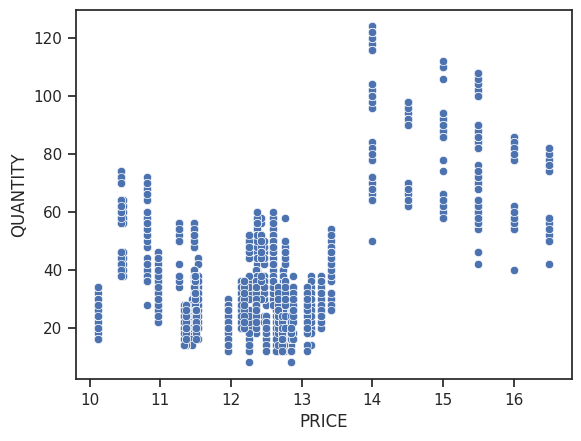

In [76]:
burger = combine_data[combine_data['ITEM_NAME'] == 'BURGER']
burger.head()
burger.shape
burger.describe()
sns.scatterplot(x = burger.PRICE, y = burger.QUANTITY)

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

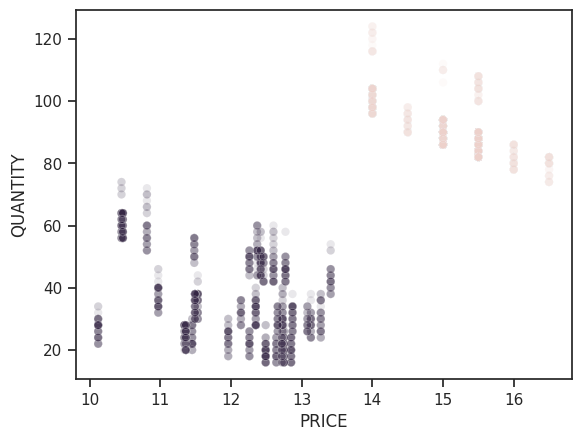

In [77]:
burger = bau[bau['ITEM_NAME'] == 'BURGER']

sns.scatterplot(data =burger, x = burger.PRICE, y = burger.QUANTITY, hue = 'SELL_ID', legend = False, alpha= 0.1)

In [78]:
np.unique(burger['SELL_ID'])

array([1070, 2051, 2052, 2053])

There is 4 different Sell_ID

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='SELL_ID', ylabel='QUANTITY'>

Text(0.5, 1.0, 'Quantity by Sell ID for Burgers')

Text(0.5, 0, 'Sell ID')

Text(0, 0.5, 'Quantity')

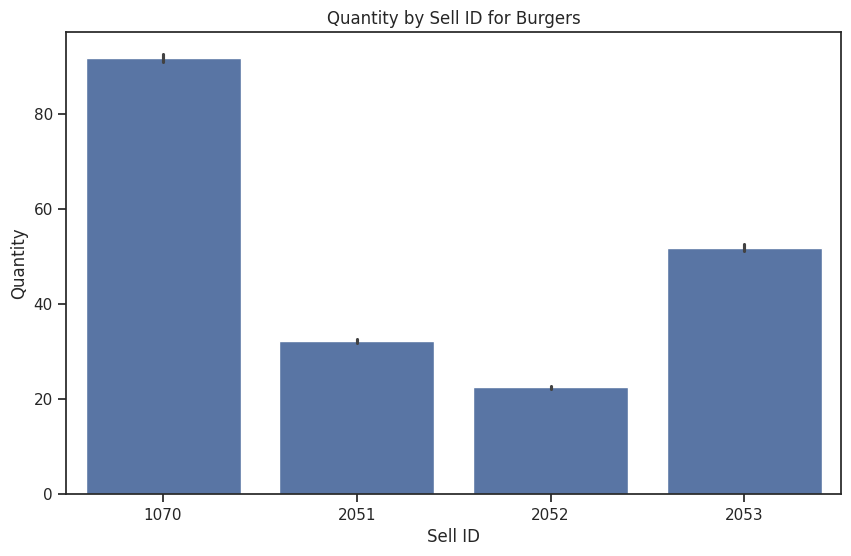

In [79]:
#bar chart for sell id by qty

plt.figure(figsize=(10, 6))
sns.barplot(x='SELL_ID', y='QUANTITY', data=burger)
plt.title('Quantity by Sell ID for Burgers')
plt.xlabel('Sell ID')
plt.ylabel('Quantity')
plt.show()


sell id might have to do with qtl

In [82]:
# look at sell id
burger_1070 =combine_data[(combine_data['ITEM_NAME']== 'BURGER')& (combine_data['SELL_ID']==1070)]
burger_1070.head()

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
0      1070              0    BURGER       1/13/12   15.5       100  2012   
8      1070              0    BURGER       1/13/13   15.5        70  2013   
16     1070              0    BURGER       1/13/14   15.5       104  2014   
24     1070              0    BURGER       1/13/15   14.0       116  2015   
32     1070              0    BURGER       1/14/12   15.5        74  2012   

       HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  \
0   No Holiday           0               0                 26.6           0   
8   No Holiday           1               0                 30.2           0   
16  No Holiday           0               0                 28.4           0   
24  No Holiday           0               0                 28.4           0   
32  No Holiday           1               0                 23.0           0   

    REVENUE TEMP_BINS  
0    1550.0      Warm  
8    1085.0       Hot  
16   1612.0      Warm  
24   1624.0      Warm  
32   1147.0      Warm

In [83]:
burger_1070.describe()

SELL_ID  SELL_CATEGORY       PRICE    QUANTITY         YEAR  \
count    837.0          837.0  837.000000  837.000000   837.000000   
mean    1070.0            0.0   15.154719   82.685783  2013.351254   
std        0.0            0.0    0.744770   15.981238     1.063043   
min     1070.0            0.0   14.000000   40.000000  2012.000000   
25%     1070.0            0.0   14.500000   68.000000  2012.000000   
50%     1070.0            0.0   15.500000   86.000000  2013.000000   
75%     1070.0            0.0   15.500000   92.000000  2014.000000   
max     1070.0            0.0   16.500000  124.000000  2015.000000   

       IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  \
count  837.000000      837.000000           837.000000  837.000000   
mean     0.284349        0.200717            56.255914    0.878136   
std      0.451373        0.400776            20.005316    0.327324   
min      0.000000        0.000000            14.000000    0.000000   
25%      0.000000        0.000000            35.600000    1.000000   
50%      0.000000        0.000000            59.000000    1.000000   
75%      1.000000        0.000000            75.200000    1.000000   
max      1.000000        1.000000            87.800000    1.000000   

           REVENUE  
count   837.000000  
mean   1248.389486  
std     223.356328  
min     640.000000  
25%     992.000000  
50%    1320.000000  
75%    1380.000000  
max    1736.000000

### Modeling

In [84]:
# modeling for combined data
burger_model = ols('QUANTITY ~ PRICE', data = burger_1070).fit()
print(burger_model.summary())

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     153.9
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           1.45e-32
Time:                        13:59:50   Log-Likelihood:                -3436.0
No. Observations:                 837   AIC:                             6876.
Df Residuals:                     835   BIC:                             6885.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    210.9859     10.353     20.379      0.0

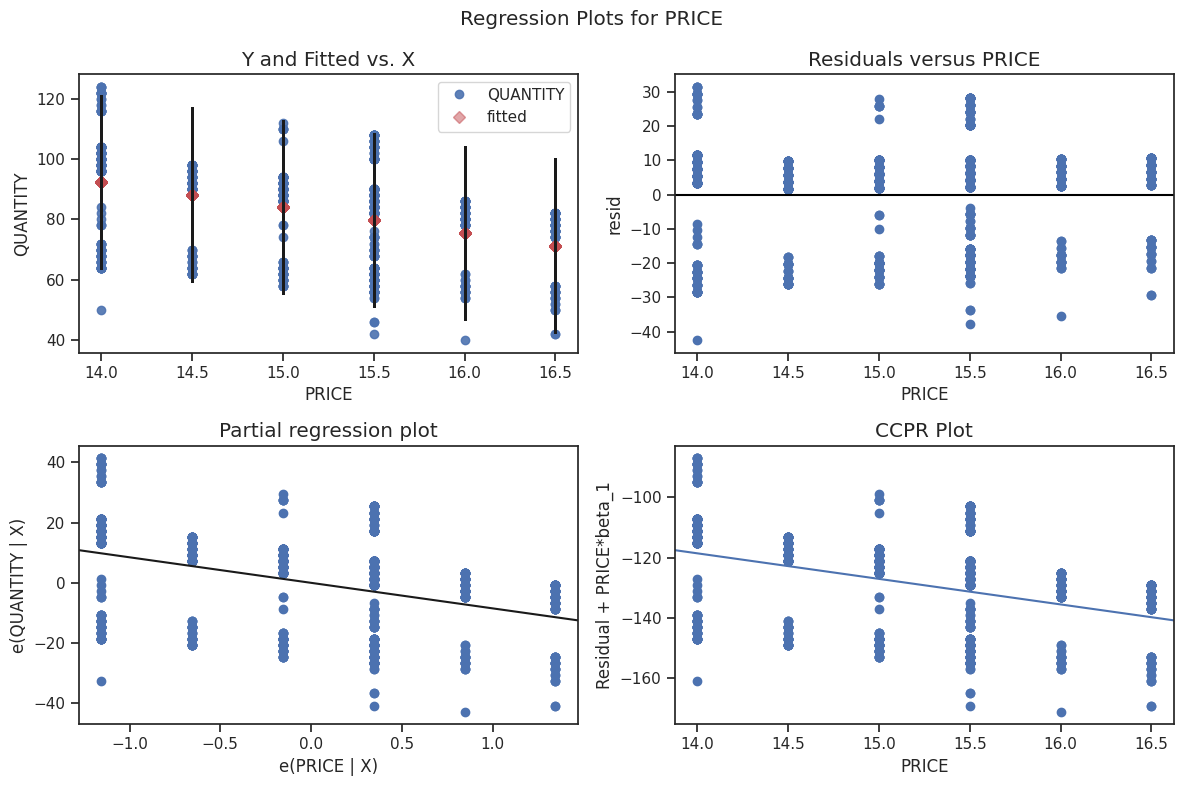

In [85]:
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(burger_model, 'PRICE', fig=fig)

**Insights for burger model with combined data**

very low R-squared of .16

Price Elasticity(coef) is -8.46

Big variance which leads to the low R-Squared

**Non holliday and school day data**


SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
0      1070              0    BURGER       1/13/12  15.50       100  2012   
1      2051              2    BURGER       1/13/12  12.73        40  2012   
3      2052              2    BURGER       1/13/12  12.75        26  2012   
5      2053              2    BURGER       1/13/12  12.60        58  2012   
16     1070              0    BURGER       1/13/14  15.50       104  2014   

       HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  \
0   No Holiday           0               0                 26.6           0   
1   No Holiday           0               0                 26.6           0   
3   No Holiday           0               0                 26.6           0   
5   No Holiday           0               0                 26.6           0   
16  No Holiday           0               0                 28.4           0   

    REVENUE TEMP_BINS  
0    1550.0      Warm  
1     509.2      Warm  
3     331.5      Warm  
5     730.8      Warm  
16   1612.0      Warm

(1884, 14)

SELL_ID  SELL_CATEGORY        PRICE     QUANTITY         YEAR  \
count  1884.000000    1884.000000  1884.000000  1884.000000  1884.000000   
mean   1806.500000       1.500000    12.830340    49.562633  2013.186837   
std     425.331956       0.866255     1.567257    27.309516     1.058620   
min    1070.000000       0.000000    10.120000    16.000000  2012.000000   
25%    1805.750000       1.500000    11.530000    28.000000  2012.000000   
50%    2051.500000       2.000000    12.640000    40.000000  2013.000000   
75%    2052.250000       2.000000    13.557500    74.000000  2014.000000   
max    2053.000000       2.000000    16.500000   124.000000  2015.000000   

       IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE   IS_OUTDOOR  \
count      1884.0          1884.0          1884.000000  1884.000000   
mean          0.0             0.0            53.691720     0.883227   
std           0.0             0.0            18.721922     0.321235   
min           0.0             0.0            14.000000     0.000000   
25%           0.0             0.0            35.600000     1.000000   
50%           0.0             0.0            53.600000     1.000000   
75%           0.0             0.0            71.600000     1.000000   
max           0.0             0.0            87.800000     1.000000   

           REVENUE  
count  1884.000000  
mean    663.957442  
std     437.111938  
min     199.840000  
25%     330.980000  
50%     509.390000  
75%     888.990000  
max    1736.000000

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

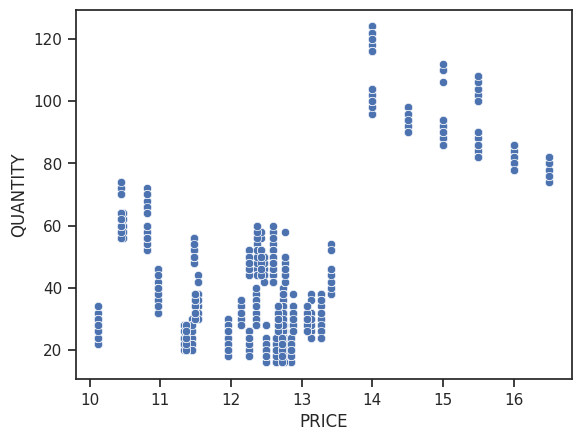

In [86]:
burger = bau[bau['ITEM_NAME'] == 'BURGER']
burger.head()
burger.shape
burger.describe()
sns.scatterplot(x = burger.PRICE, y = burger.QUANTITY)

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

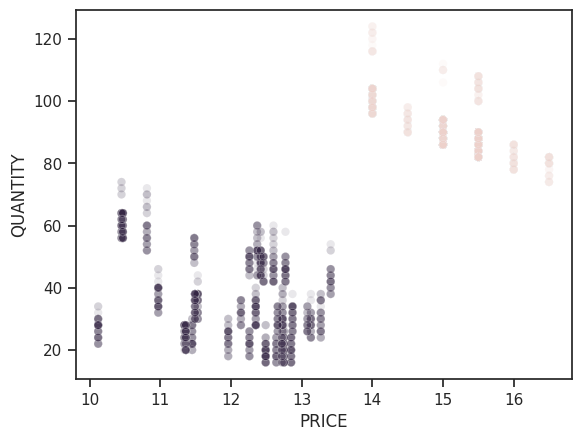

In [87]:
burger = bau[bau['ITEM_NAME'] == 'BURGER']

sns.scatterplot(data =burger, x = burger.PRICE, y = burger.QUANTITY, hue = 'SELL_ID', legend = False, alpha= 0.1)

We can see less clusters

In [88]:
# check to make sure no data values is missing
np.unique(bau['SELL_ID'])

array([1070, 2051, 2052, 2053])

In [89]:
np.unique(bau['SELL_CATEGORY'])

array([0, 2])

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
0      1070              0    BURGER       1/13/12   15.5       100  2012   
16     1070              0    BURGER       1/13/14   15.5       104  2014   
24     1070              0    BURGER       1/13/15   14.0       116  2015   
48     1070              0    BURGER       1/14/14   15.5        86  2014   
56     1070              0    BURGER       1/14/15   14.0       122  2015   

       HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  \
0   No Holiday           0               0                 26.6           0   
16  No Holiday           0               0                 28.4           0   
24  No Holiday           0               0                 28.4           0   
48  No Holiday           0               0                 28.4           1   
56  No Holiday           0               0                 30.2           0   

    REVENUE TEMP_BINS  
0    1550.0      Warm  
16   1612.0      Warm  
24   1624.0      Warm  
48   1333.0      Warm  
56   1708.0       Hot

(471, 14)

SELL_ID  SELL_CATEGORY       PRICE    QUANTITY         YEAR  \
count    471.0          471.0  471.000000  471.000000   471.000000   
mean    1070.0            0.0   15.124204   91.622081  2013.186837   
std        0.0            0.0    0.705577    9.437897     1.059464   
min     1070.0            0.0   14.000000   74.000000  2012.000000   
25%     1070.0            0.0   14.500000   86.000000  2012.000000   
50%     1070.0            0.0   15.500000   90.000000  2013.000000   
75%     1070.0            0.0   15.500000   98.000000  2014.000000   
max     1070.0            0.0   16.500000  124.000000  2015.000000   

       IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  \
count       471.0           471.0           471.000000  471.000000   
mean          0.0             0.0            53.691720    0.883227   
std           0.0             0.0            18.736854    0.321491   
min           0.0             0.0            14.000000    0.000000   
25%           0.0             0.0            35.600000    1.000000   
50%           0.0             0.0            53.600000    1.000000   
75%           0.0             0.0            70.700000    1.000000   
max           0.0             0.0            87.800000    1.000000   

           REVENUE  
count   471.000000  
mean   1381.076433  
std     106.792215  
min    1221.000000  
25%    1316.000000  
50%    1353.000000  
75%    1400.000000  
max    1736.000000

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

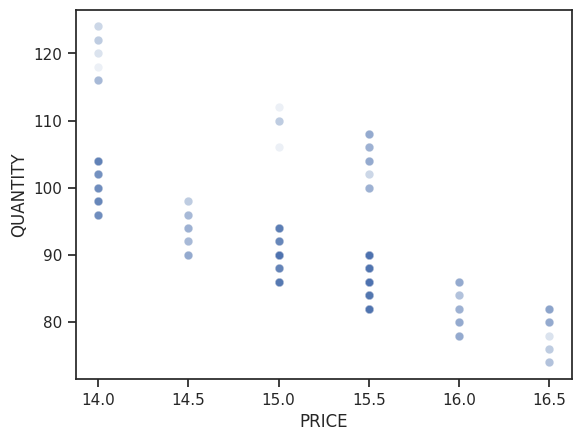

In [90]:
burger_1070 = bau[(bau['ITEM_NAME']== 'BURGER')& (bau['SELL_ID']==1070)]
burger_1070.head()
burger_1070.shape
burger_1070.describe()
sns.scatterplot(data = burger_1070, x = burger_1070.PRICE, y = burger_1070.QUANTITY, alpha = 0.1)

The scatter plot is cleaner and has less clusters. We see two seperate trends

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     444.2
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           7.16e-70
Time:                        22:08:30   Log-Likelihood:                -1568.2
No. Observations:                 471   AIC:                             3140.
Df Residuals:                     469   BIC:                             3149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    232.7193      6.702     34.726      0.0

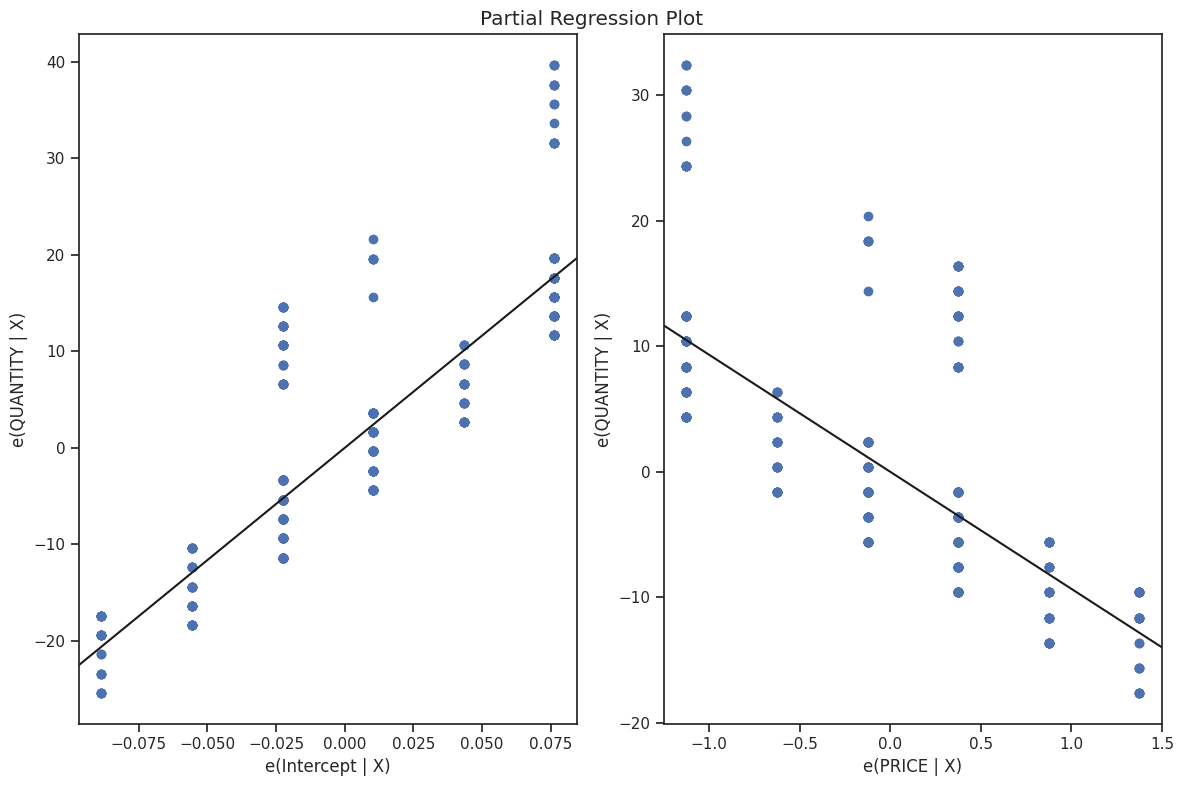

In [187]:
burger_modelBau = ols('QUANTITY ~ PRICE', data = burger_1070).fit()
print(burger_modelBau.summary())
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_partregress_grid(burger_modelBau, fig=fig)

**Insights**

R-squared is higher with a score of .486 rounding to .49

price Elasticiy(Coef) : 9.32

Variation has reduced

We see two seprate trends

In [ ]:
bau.head()

In [92]:
# looking at no holliday, no school break and out doors is true/ 1
bau2 = combine_data[(combine_data['HOLIDAY'] == 'No Holiday') & (combine_data['IS_SCHOOLBREAK'] == 0)& (combine_data['IS_WEEKEND'] == 0) & (combine_data['IS_OUTDOOR'] ==1 )]


SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
48      1070              0    BURGER       1/14/14   15.5        86  2014   
88      1070              0    BURGER       1/15/15   14.0       104  2015   
120     1070              0    BURGER       1/16/15   14.0       100  2015   
448     1070              0    BURGER       1/27/12   15.5        86  2012   
576     1070              0    BURGER       1/31/12   15.5        84  2012   

        HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  \
48   No Holiday           0               0                 28.4           1   
88   No Holiday           0               0                 32.0           1   
120  No Holiday           0               0                 32.0           1   
448  No Holiday           0               0                 32.0           1   
576  No Holiday           0               0                 32.0           1   

     REVENUE TEMP_BINS  
48    1333.0      Warm  
88    1456.0       Hot  
120   1400.0       Hot  
448   1333.0       Hot  
576   1302.0       Hot

(416, 14)

SELL_ID  SELL_CATEGORY       PRICE    QUANTITY         YEAR  \
count    416.0          416.0  416.000000  416.000000   416.000000   
mean    1070.0            0.0   15.139423   89.274038  2013.201923   
std        0.0            0.0    0.709511    6.811889     1.076628   
min     1070.0            0.0   14.000000   74.000000  2012.000000   
25%     1070.0            0.0   14.500000   84.000000  2012.000000   
50%     1070.0            0.0   15.000000   88.000000  2013.000000   
75%     1070.0            0.0   15.500000   94.000000  2014.000000   
max     1070.0            0.0   16.500000  104.000000  2015.000000   

       IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  \
count       416.0           416.0           416.000000       416.0   
mean          0.0             0.0            57.282212         1.0   
std           0.0             0.0            16.890613         0.0   
min           0.0             0.0            26.600000         1.0   
25%           0.0             0.0            41.000000         1.0   
50%           0.0             0.0            59.000000         1.0   
75%           0.0             0.0            71.600000         1.0   
max           0.0             0.0            87.800000         1.0   

           REVENUE  
count   416.000000  
mean   1347.209135  
std      52.323986  
min    1221.000000  
25%    1305.000000  
50%    1350.000000  
75%    1392.000000  
max    1456.000000

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

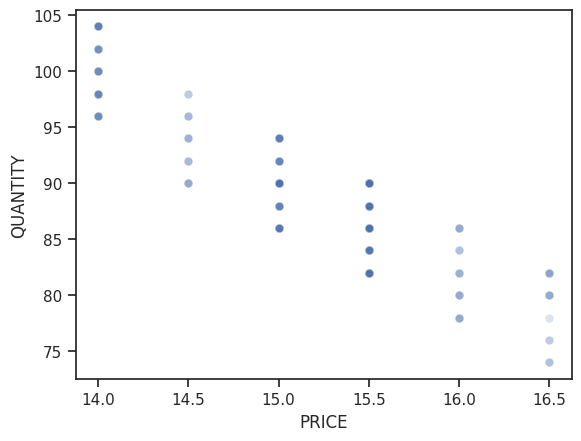

In [93]:
# filtering
burger_1070bau = bau2[(bau2['ITEM_NAME']== 'BURGER')& (bau2['SELL_ID']==1070)]
burger_1070bau.head()
burger_1070bau.shape
burger_1070bau.describe()
sns.scatterplot(data = burger_1070bau, x = burger_1070bau.PRICE, y = burger_1070bau.QUANTITY, alpha = 0.1)


The two trends is seperated.  

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Tue, 17 Sep 2024   Prob (F-statistic):          5.51e-153
Time:                        14:04:21   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    220.3600      3.090     71.322      0.0

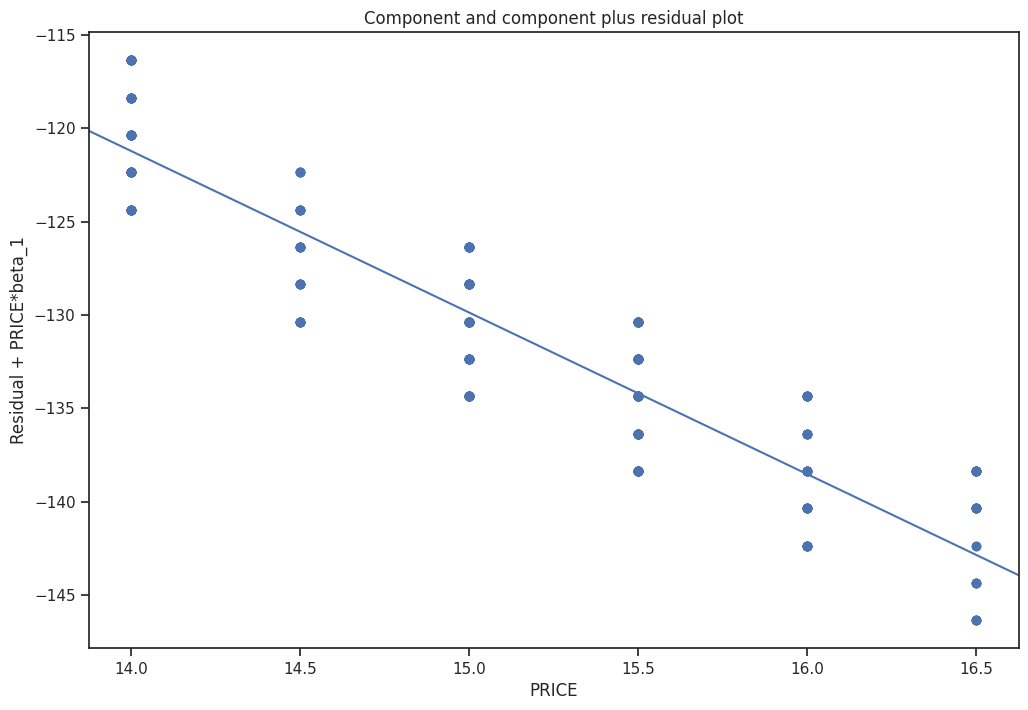

In [94]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

burger_model = ols('QUANTITY ~ PRICE', data = burger_1070bau).fit()
print(burger_model.summary())
# create the figure and axes outside the plot_ccpr function
fig, ax = plt.subplots(figsize=(12, 8))
# Pass the axes object to the ax argument
fig = sm.graphics.plot_ccpr(burger_model, 'PRICE', ax=ax)

**Summary**
* R-squared is much higher at 81%.

* The price elasticity (coefficient) is -8.6.

* We can see a clear downward slope, indicating a negative relationship.

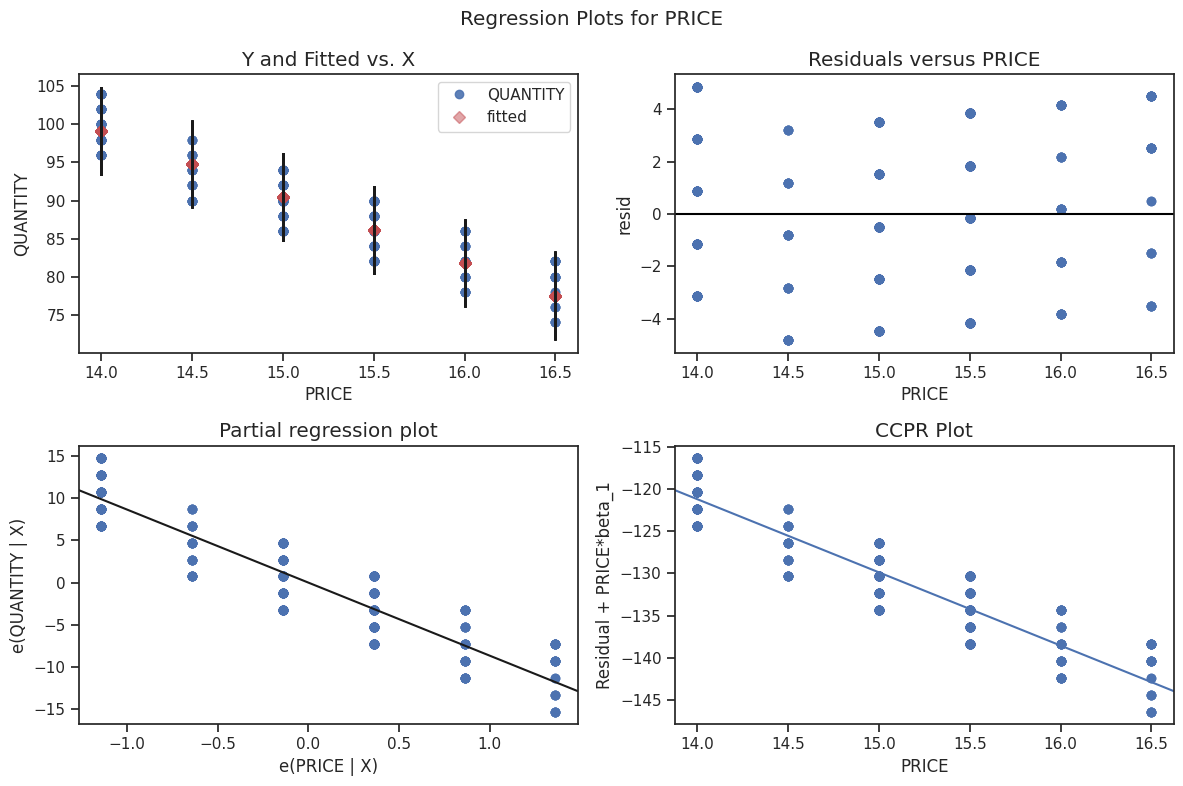

In [95]:
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(burger_model, 'PRICE', fig=fig)

**Chart Insights**

Y and Fitted vs. X: The plot shows the actual quantity versus price and the fitted values from the regression model. The fitted values closely follow the observed data, indicating a good fit.

Residuals vs. PRICE: The residuals appear randomly scattered around zero, suggesting that the linear regression model does not have any major issues with non-linearity or heteroscedasticity.

Partial Regression Plot: This plot demonstrates the linear relationship between the dependent variable (quantity) and the independent variable (price) after removing the effects of other variables. The downward slope indicates a negative relationship between price and quantity.

CCPR Plot (Component-Component Plus Residual Plot): The plot confirms the negative linear relationship between price and quantity, showing that as price increases, the predicted quantity decreases.

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
2      2051              2      COKE       1/13/12  12.73        40  2012   
10     2051              2      COKE       1/13/13  13.13        26  2013   
18     2051              2      COKE       1/13/14  13.27        38  2014   
26     2051              2      COKE       1/13/15  11.53        38  2015   
34     2051              2      COKE       1/14/12  12.73        24  2012   

       HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  \
2   No Holiday           0               0                 26.6           0   
10  No Holiday           1               0                 30.2           0   
18  No Holiday           0               0                 28.4           0   
26  No Holiday           0               0                 28.4           0   
34  No Holiday           1               0                 23.0           0   

    REVENUE TEMP_BINS  
2    509.20      Warm  
10   341.38       Hot  
18   504.26      Warm  
26   438.14      Warm  
34   305.52      Warm

(837, 14)

SELL_ID  SELL_CATEGORY       PRICE    QUANTITY         YEAR  \
count    837.0          837.0  837.000000  837.000000   837.000000   
mean    2051.0            2.0   12.368017   29.498208  2013.351254   
std        0.0            0.0    0.726329    5.782878     1.063043   
min     2051.0            2.0   10.970000   12.000000  2012.000000   
25%     2051.0            2.0   11.530000   26.000000  2012.000000   
50%     2051.0            2.0   12.660000   30.000000  2013.000000   
75%     2051.0            2.0   13.080000   34.000000  2014.000000   
max     2051.0            2.0   13.270000   46.000000  2015.000000   

       IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR     REVENUE  
count  837.000000      837.000000           837.000000  837.000000  837.000000  
mean     0.284349        0.200717            56.255914    0.878136  363.322222  
std      0.451373        0.400776            20.005316    0.327324   66.307601  
min      0.000000        0.000000            14.000000    0.000000  156.960000  
25%      0.000000        0.000000            35.600000    1.000000  318.480000  
50%      0.000000        0.000000            59.000000    1.000000  367.680000  
75%      1.000000        0.000000            75.200000    1.000000  415.080000  
max      1.000000        1.000000            87.800000    1.000000  509.200000

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

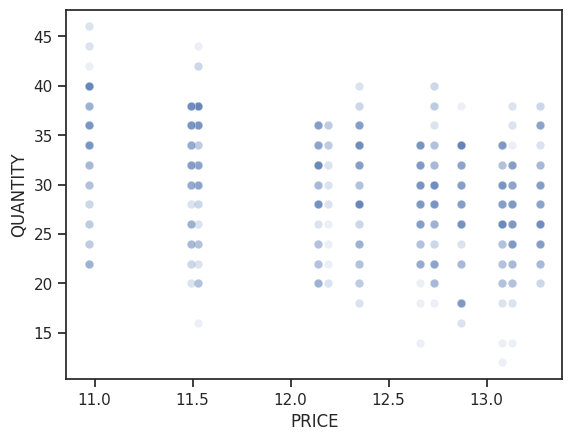

In [99]:
burger_2051 = combine_data[(combine_data['ITEM_NAME'] == 'COKE') & (combine_data['SELL_ID']==2051)]

burger_2051.head()
burger_2051.shape
burger_2051.describe()
sns.scatterplot(data=burger_2051, x=burger_2051.PRICE, y=burger_2051.QUANTITY, alpha=0.1)


                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     124.7
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           4.45e-27
Time:                        14:52:09   Log-Likelihood:                -2597.8
No. Observations:                 837   AIC:                             5200.
Df Residuals:                     835   BIC:                             5209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.9906      3.184     20.411      0.0

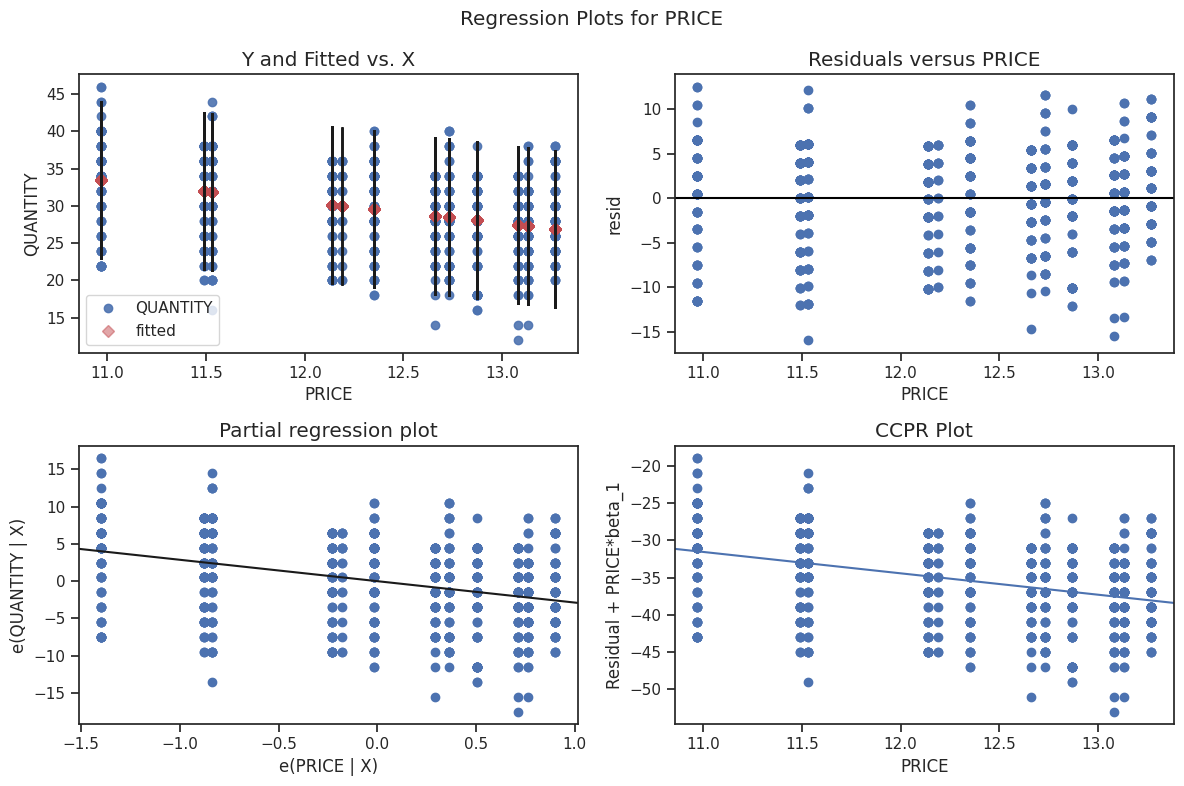

In [100]:
burger_model = ols('QUANTITY ~ PRICE', data = burger_2051).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(burger_model, 'PRICE', fig=fig)

### Looking at Coke, coffe and lemomnade  for Combine Data

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
2      2051              2      COKE       1/13/12  12.73        40  2012   
7      2053              2      COKE       1/13/12  12.60        58  2012   
10     2051              2      COKE       1/13/13  13.13        26  2013   
15     2053              2      COKE       1/13/13  13.41        32  2013   
18     2051              2      COKE       1/13/14  13.27        38  2014   

       HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  \
2   No Holiday           0               0                 26.6           0   
7   No Holiday           0               0                 26.6           0   
10  No Holiday           1               0                 30.2           0   
15  No Holiday           1               0                 30.2           0   
18  No Holiday           0               0                 28.4           0   

    REVENUE TEMP_BINS  
2    509.20      Warm  
7    730.80      Warm  
10   341.38       Hot  
15   429.12       Hot  
18   504.26      Warm

(1674, 14)

SELL_ID  SELL_CATEGORY        PRICE     QUANTITY         YEAR  \
count  1674.000000         1674.0  1674.000000  1674.000000  1674.000000   
mean   2052.000000            2.0    12.151326    38.150538  2013.351254   
std       1.000299            0.0     0.871405    11.861375     1.062726   
min    2051.000000            2.0    10.450000    12.000000  2012.000000   
25%    2051.000000            2.0    11.490000    30.000000  2012.000000   
50%    2052.000000            2.0    12.370000    36.000000  2013.000000   
75%    2053.000000            2.0    12.770000    48.000000  2014.000000   
max    2053.000000            2.0    13.410000    74.000000  2015.000000   

        IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE   IS_OUTDOOR  \
count  1674.000000     1674.000000          1674.000000  1674.000000   
mean      0.284349        0.200717            56.255914     0.878136   
std       0.451239        0.400656            19.999336     0.327226   
min       0.000000        0.000000            14.000000     0.000000   
25%       0.000000        0.000000            35.600000     1.000000   
50%       0.000000        0.000000            59.000000     1.000000   
75%       1.000000        0.000000            75.200000     1.000000   
max       1.000000        1.000000            87.800000     1.000000   

           REVENUE  
count  1674.000000  
mean    458.460717  
std     127.598266  
min     156.960000  
25%     366.240000  
50%     432.610000  
75%     579.600000  
max     778.320000

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

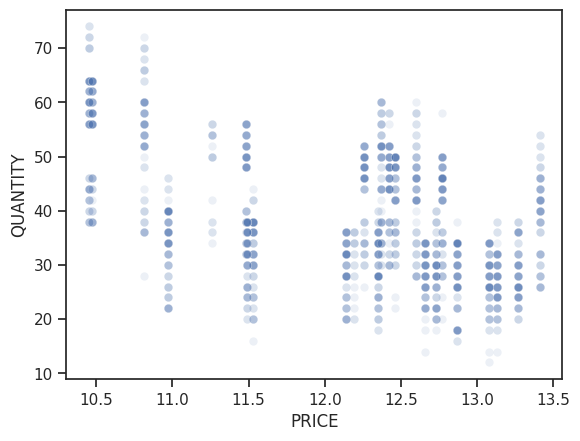

In [102]:
coke =combine_data[combine_data['ITEM_NAME'] == 'COKE']
coke.head()
coke.shape
coke.describe()
sns.scatterplot(x = coke.PRICE, y = coke.QUANTITY, alpha = 0.1)

Chart is pretty scattered and dont see a noticaeable trend

Price range from 10.45 - 13.41

QTy Range from 12- 74

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     544.2
Date:                Tue, 17 Sep 2024   Prob (F-statistic):          1.94e-104
Time:                        15:24:12   Log-Likelihood:                -6279.2
No. Observations:                1674   AIC:                         1.256e+04
Df Residuals:                    1672   BIC:                         1.257e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    120.1140      3.522     34.100      0.0

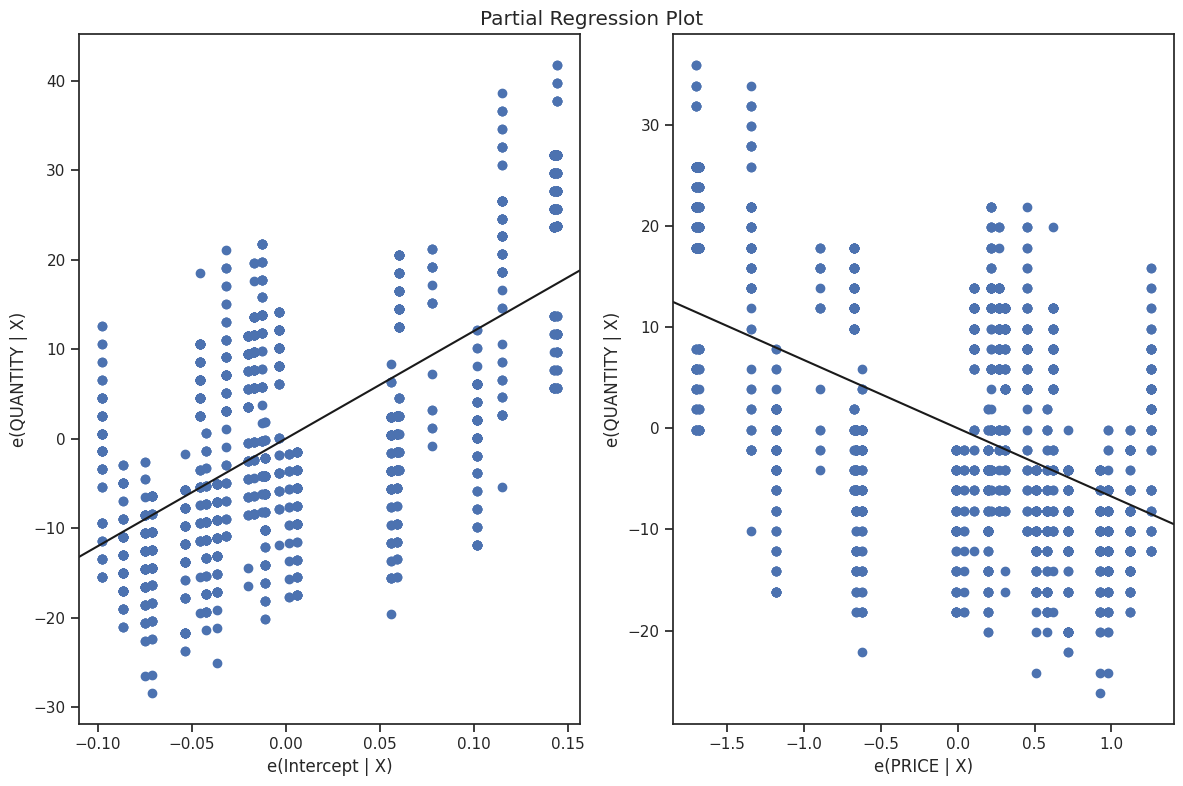

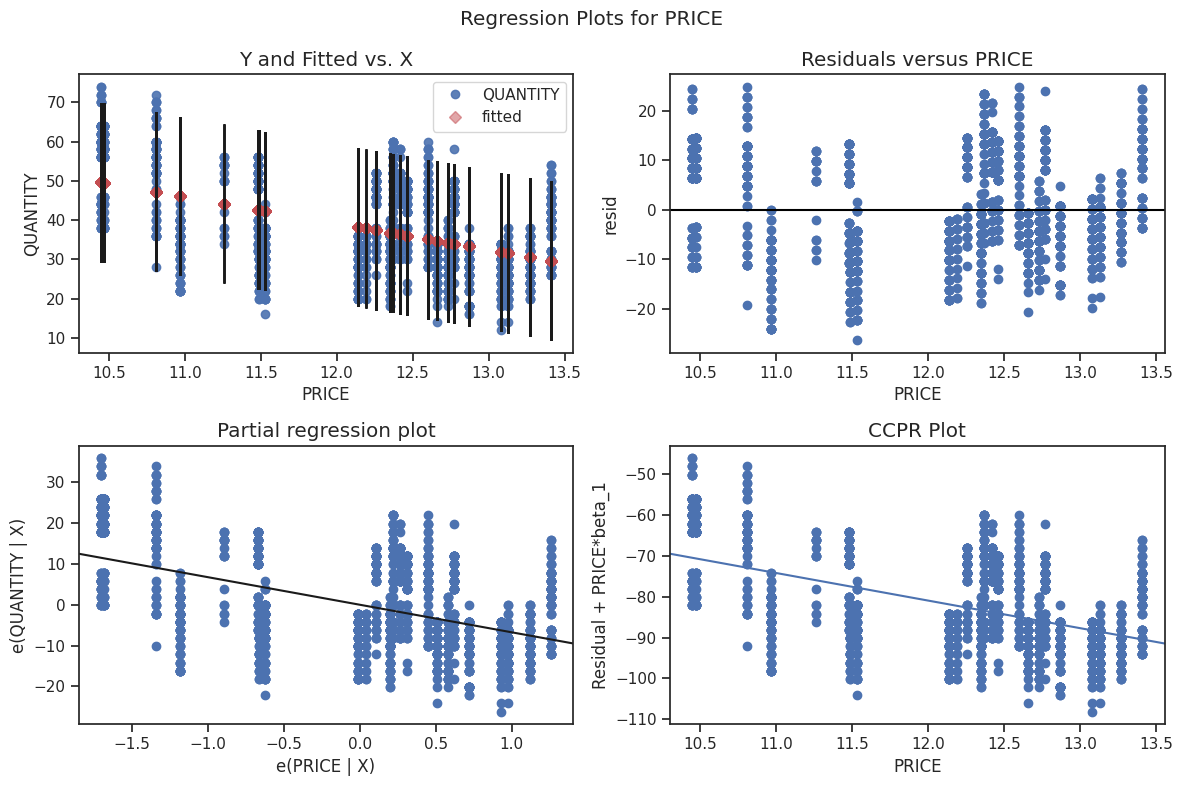

In [108]:
coke_model = ols('QUANTITY ~ PRICE', data = coke).fit()
print(coke_model.summary())
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_partregress_grid(coke_model,  fig=fig)
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(coke_model, 'PRICE', fig=fig)

**Insights**

Coke Combine has a higher r squared of .25 compared to burger combined model
Still very low r squared

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
6      2053              2    COFFEE       1/13/12  12.60        58  2012   
14     2053              2    COFFEE       1/13/13  13.41        32  2013   
22     2053              2    COFFEE       1/13/14  12.37        60  2014   
30     2053              2    COFFEE       1/13/15  10.81        66  2015   
38     2053              2    COFFEE       1/14/12  12.60        42  2012   

       HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  \
6   No Holiday           0               0                 26.6           0   
14  No Holiday           1               0                 30.2           0   
22  No Holiday           0               0                 28.4           0   
30  No Holiday           0               0                 28.4           0   
38  No Holiday           1               0                 23.0           0   

    REVENUE TEMP_BINS  
6    730.80      Warm  
14   429.12       Hot  
22   742.20      Warm  
30   713.46      Warm  
38   529.20      Warm

(837, 14)

SELL_ID  SELL_CATEGORY       PRICE    QUANTITY         YEAR  \
count    837.0          837.0  837.000000  837.000000   837.000000   
mean    2053.0            2.0   11.934636   46.802867  2013.351254   
std        0.0            0.0    0.947643    9.909910     1.063043   
min     2053.0            2.0   10.450000   20.000000  2012.000000   
25%     2053.0            2.0   10.810000   40.000000  2012.000000   
50%     2053.0            2.0   12.370000   48.000000  2013.000000   
75%     2053.0            2.0   12.600000   54.000000  2014.000000   
max     2053.0            2.0   13.410000   74.000000  2015.000000   

       IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR     REVENUE  
count  837.000000      837.000000           837.000000  837.000000  837.000000  
mean     0.284349        0.200717            56.255914    0.878136  553.599211  
std      0.451373        0.400776            20.005316    0.327324  100.304996  
min      0.000000        0.000000            14.000000    0.000000  255.400000  
25%      0.000000        0.000000            35.600000    1.000000  470.060000  
50%      0.000000        0.000000            59.000000    1.000000  579.600000  
75%      1.000000        0.000000            75.200000    1.000000  623.000000  
max      1.000000        1.000000            87.800000    1.000000  778.320000

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

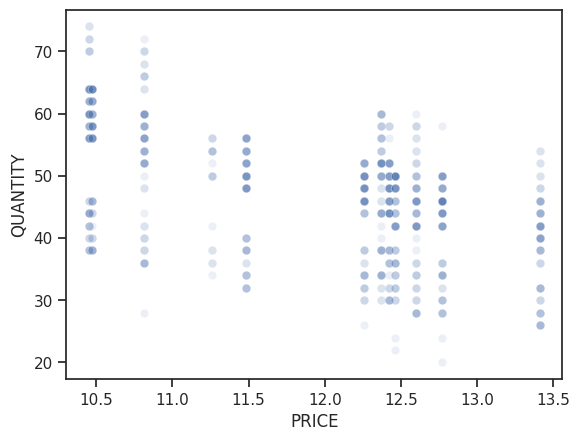

In [110]:
df = combine_data[combine_data['ITEM_NAME'] == 'COFFEE']
df.head()
df.shape
df.describe()
sns.scatterplot(x = df.PRICE, y = df.QUANTITY, alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     327.0
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           6.20e-62
Time:                        15:56:23   Log-Likelihood:                -2968.5
No. Observations:                 837   AIC:                             5941.
Df Residuals:                     835   BIC:                             5951.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    113.0116      3.673     30.770      0.0

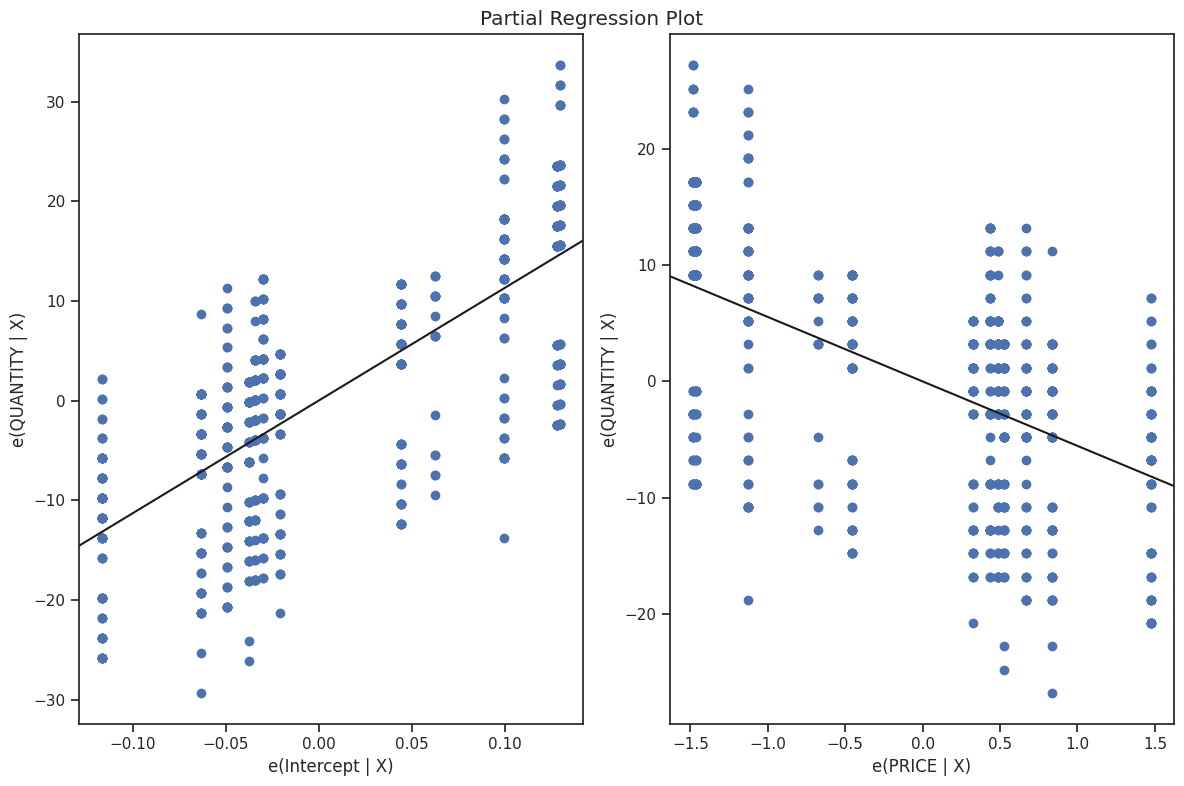

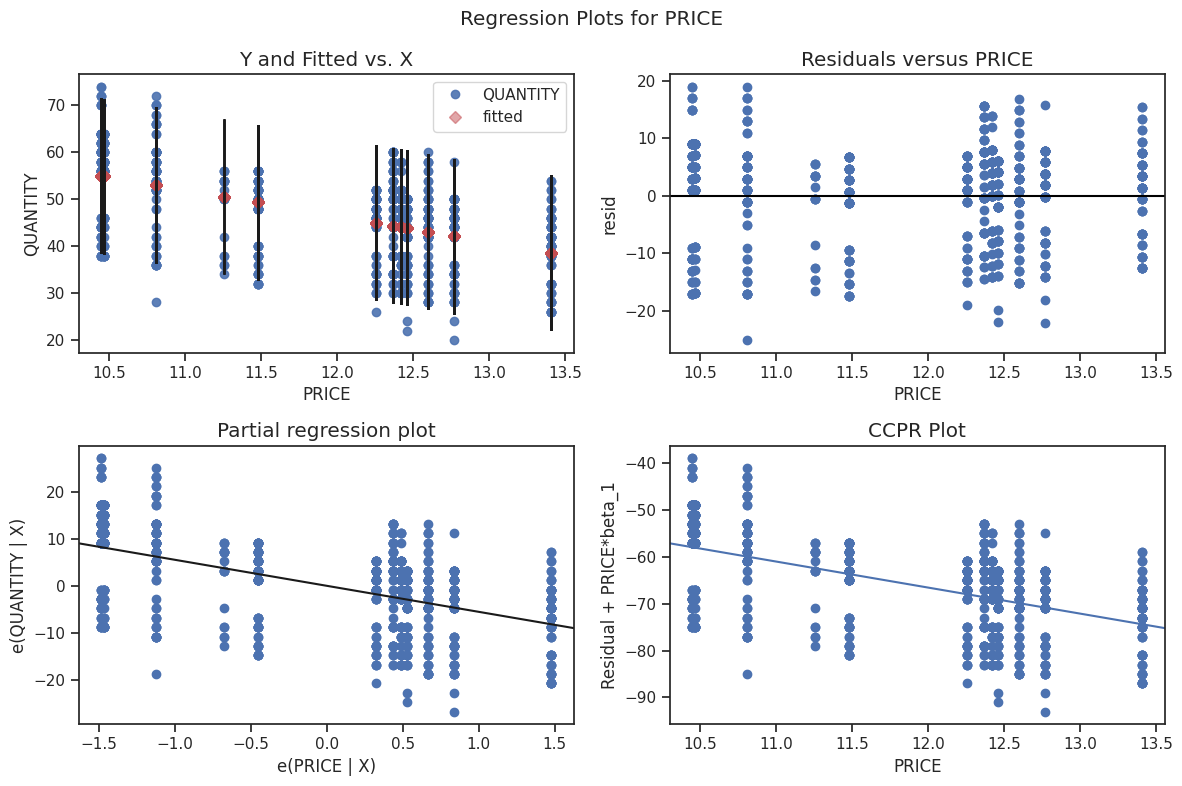

In [111]:
# make a model for coffe
df_model = ols('QUANTITY ~ PRICE', data = df).fit()
print(df_model.summary())
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_partregress_grid(df_model,  fig=fig)
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(df_model, 'PRICE', fig=fig)

Coffe has a .28 r squared
Price  -5.5476  Coef

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
4      2052              2  LEMONADE       1/13/12  12.75        26  2012   
12     2052              2  LEMONADE       1/13/13  12.64        18  2013   
20     2052              2  LEMONADE       1/13/14  11.96        24  2014   
28     2052              2  LEMONADE       1/13/15  11.45        28  2015   
36     2052              2  LEMONADE       1/14/12  12.75        20  2012   

       HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  \
4   No Holiday           0               0                 26.6           0   
12  No Holiday           1               0                 30.2           0   
20  No Holiday           0               0                 28.4           0   
28  No Holiday           0               0                 28.4           0   
36  No Holiday           1               0                 23.0           0   

    REVENUE TEMP_BINS  
4    331.50      Warm  
12   227.52       Hot  
20   287.04      Warm  
28   320.60      Warm  
36   255.00      Warm

(837, 14)

SELL_ID  SELL_CATEGORY       PRICE    QUANTITY         YEAR  \
count    837.0          837.0  837.000000  837.000000   837.000000   
mean    2052.0            2.0   11.976918   20.910394  2013.351254   
std        0.0            0.0    0.820698    4.514501     1.063043   
min     2052.0            2.0   10.120000    8.000000  2012.000000   
25%     2052.0            2.0   11.360000   18.000000  2012.000000   
50%     2052.0            2.0   12.260000   20.000000  2013.000000   
75%     2052.0            2.0   12.720000   24.000000  2014.000000   
max     2052.0            2.0   12.850000   34.000000  2015.000000   

       IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR     REVENUE  
count  837.000000      837.000000           837.000000  837.000000  837.000000  
mean     0.284349        0.200717            56.255914    0.878136  248.726022  
std      0.451373        0.400776            20.005316    0.327324   48.097961  
min      0.000000        0.000000            14.000000    0.000000   98.080000  
25%      0.000000        0.000000            35.600000    1.000000  220.680000  
50%      0.000000        0.000000            59.000000    1.000000  249.800000  
75%      1.000000        0.000000            75.200000    1.000000  283.360000  
max      1.000000        1.000000            87.800000    1.000000  358.800000

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

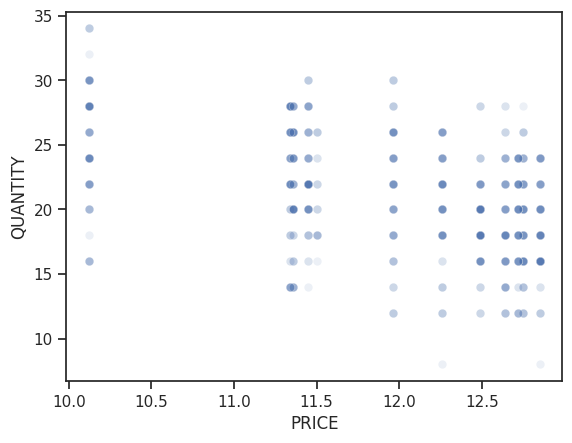

In [112]:
# looking at lemonade

df = combine_data[combine_data['ITEM_NAME'] == 'LEMONADE']
df.head()
df.shape
df.describe()
sns.scatterplot(x = df.PRICE, y = df.QUANTITY, alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     228.7
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           7.46e-46
Time:                        16:25:19   Log-Likelihood:                -2347.4
No. Observations:                 837   AIC:                             4699.
Df Residuals:                     835   BIC:                             4708.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.4615      2.025     25.416      0.0

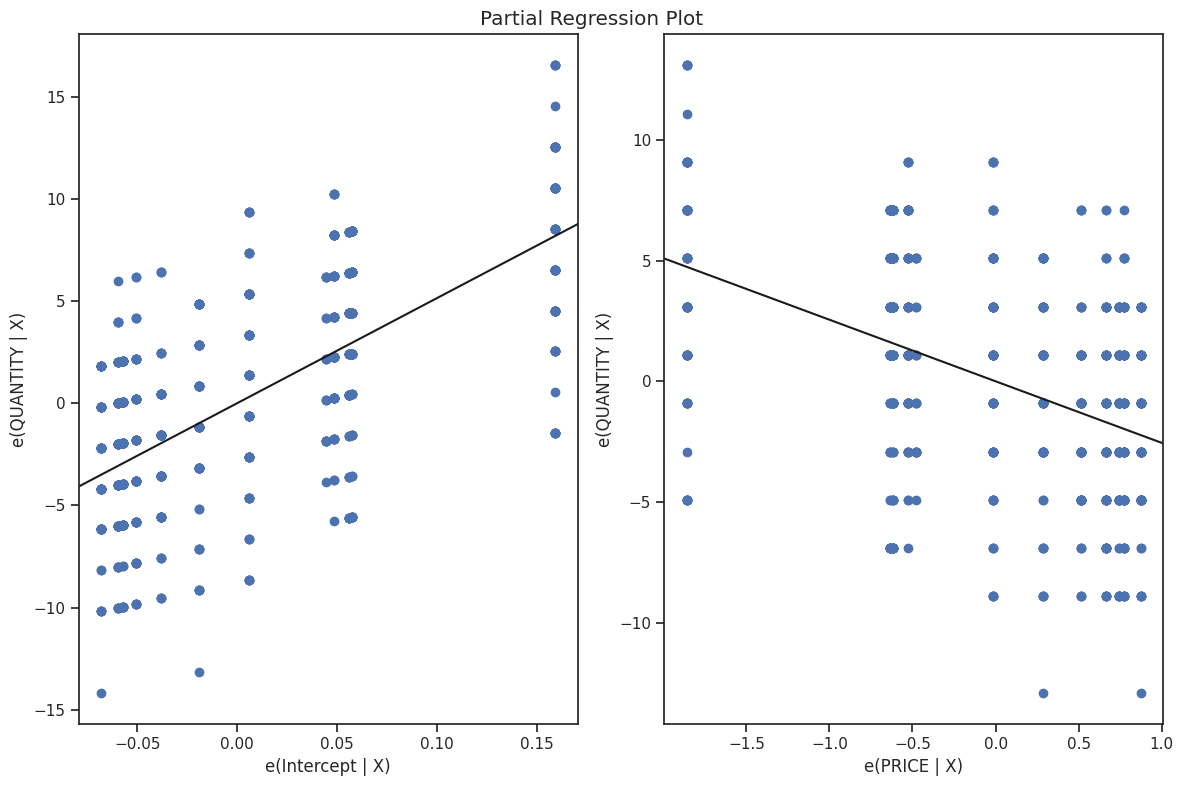

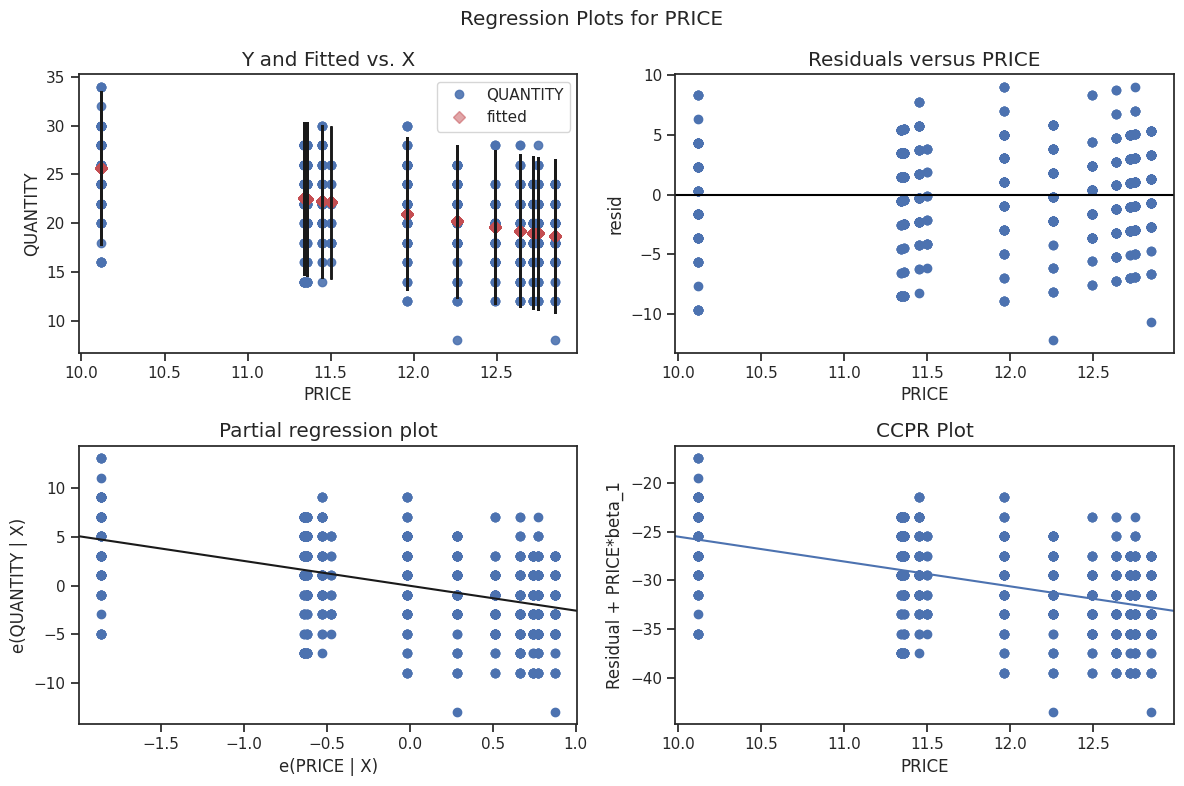

In [113]:
# make the model
model = ols('QUANTITY ~ PRICE', data = df).fit()
print(model.summary())
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_partregress_grid(model,  fig=fig)
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(model, 'PRICE', fig=fig)

In [114]:
# dic to store elasticities of the product
elasticities = {}

In [146]:
# fucntion to take in data
def create_model_and_find_elasticities(data):
  model = ols('QUANTITY ~ PRICE', data = data).fit()
  price_elasticity = model.params['PRICE']
  elasticities[data['ITEM_NAME'].iloc[0]] = price_elasticity
  print("Price elasticity of the product: " + str(price_elasticity))
  print(model.summary())
  fig = plt.figure(figsize=(12, 8))
  fig = sm.graphics.plot_partregress_grid(model,  fig=fig)
  return price_elasticity, model


Price elasticity of the product: -8.658581488470567
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Tue, 17 Sep 2024   Prob (F-statistic):          5.51e-153
Time:                        20:50:37   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


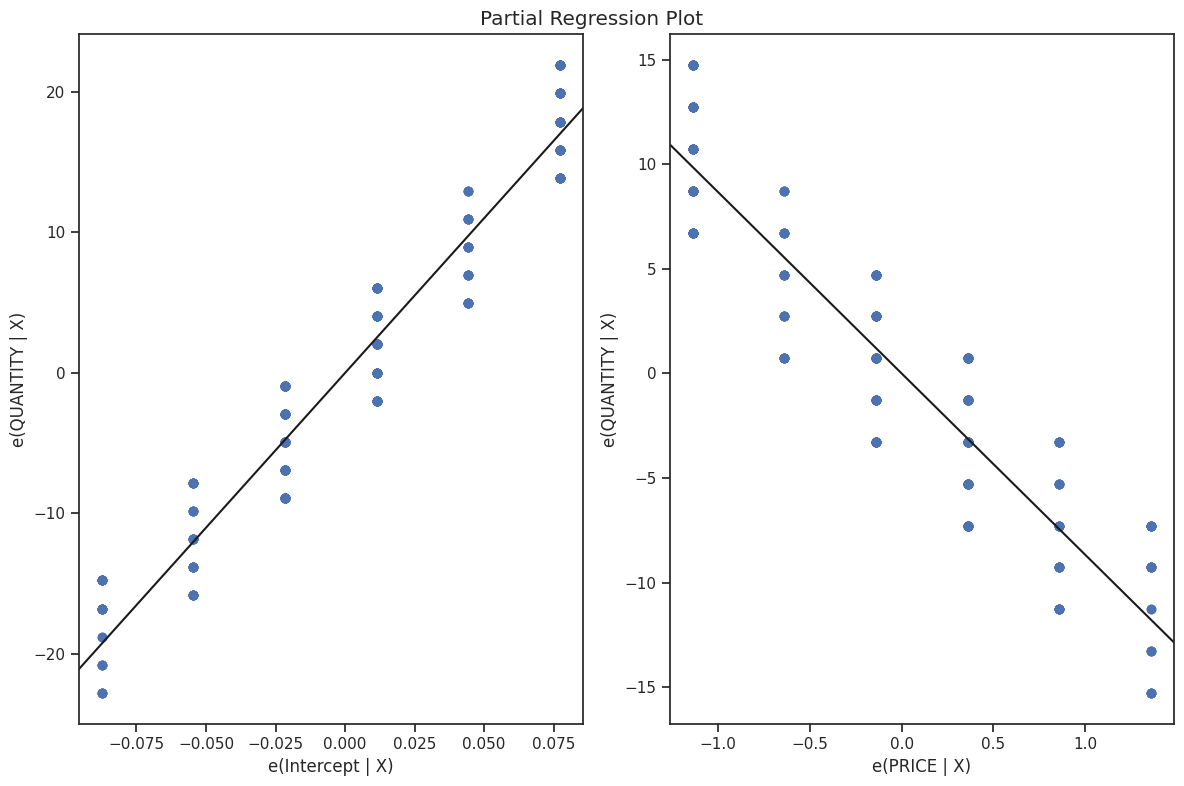

In [147]:
price_elasticity = create_model_and_find_elasticities(burger_1070bau)
elasticities['burger_1070'] = price_elasticity

Price elasticity of the product: -3.618990615456309
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     363.3
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           1.34e-58
Time:                        20:52:00   Log-Likelihood:                -1021.5
No. Observations:                 416   AIC:                             2047.
Df Residuals:                     414   BIC:                             2055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


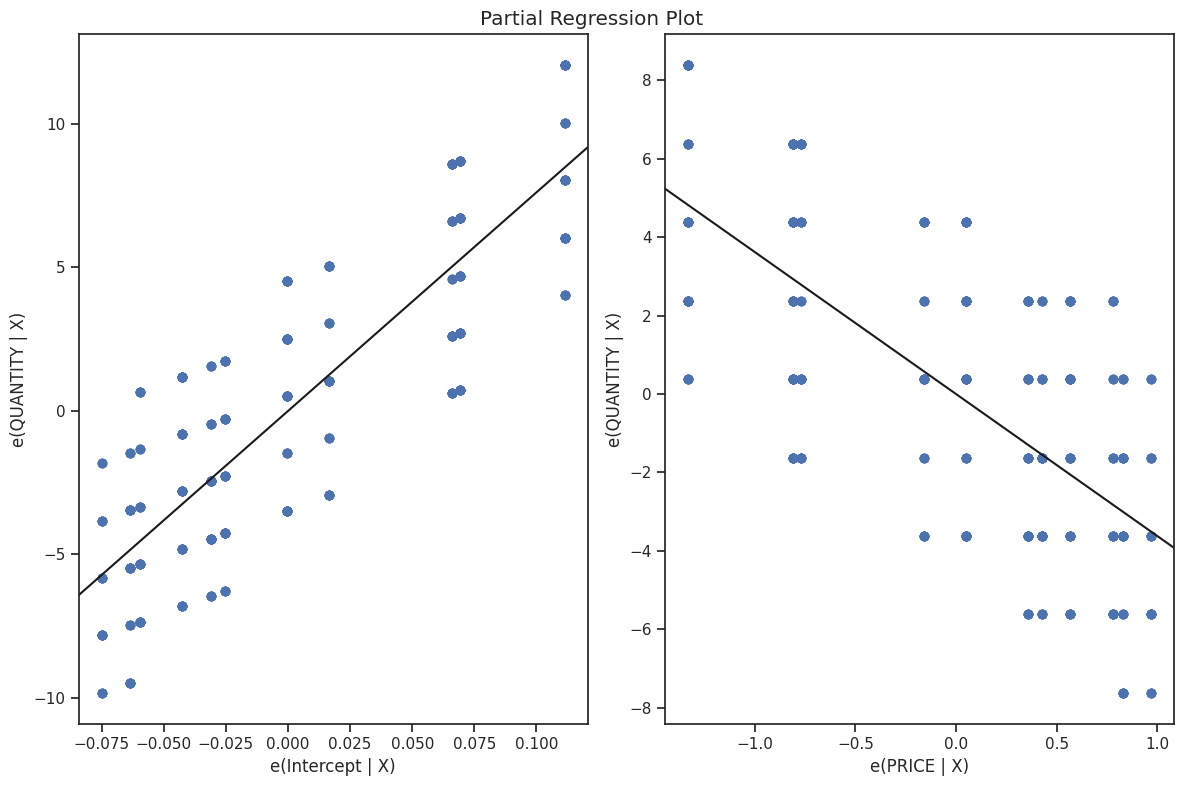

In [149]:
burger2051_date = bau2[(bau2['ITEM_NAME'] == 'BURGER') & (bau2['SELL_ID'] == 2051)]

elasticities['burger_2052'] = create_model_and_find_elasticities(burger2051_date)

Price elasticity of the product: -6.164156666230162
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1784.
Date:                Tue, 17 Sep 2024   Prob (F-statistic):          3.72e-152
Time:                        20:52:04   Log-Likelihood:                -1035.7
No. Observations:                 416   AIC:                             2075.
Df Residuals:                     414   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


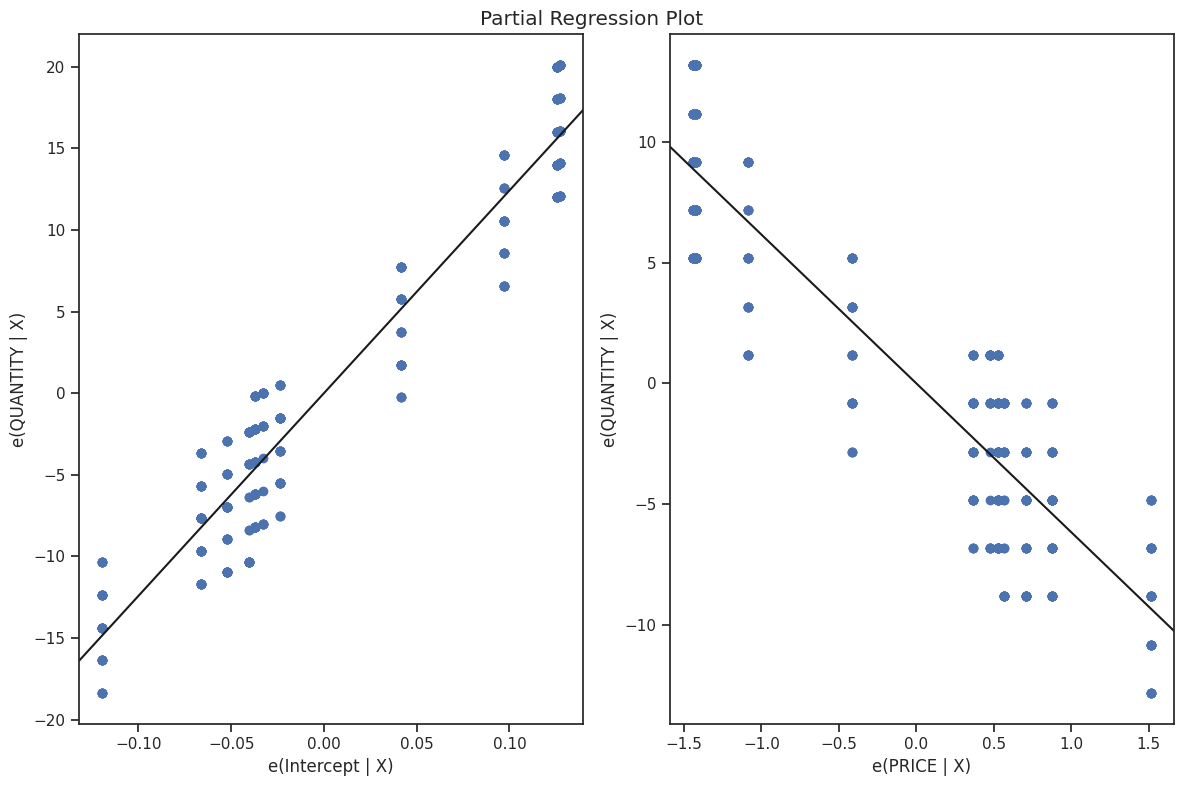

In [150]:
burger2053_data = bau2[(bau2['ITEM_NAME'] == 'BURGER') & (bau2['SELL_ID'] == 2053)]

elasticities['burger_2053'] = create_model_and_find_elasticities(burger2053_data)

**Insights**

We can see that the sell ID affects the burger price and quantity. The sell ID is associated with different item combinations, such as a burger alone, a burger with lemonade, a burger with Coke, and a burger with coffee.

R-squared for sell id 2053: 81

Price Coef: 6.16


**Looking at Drinks**

Price elasticity of the product: -7.460103485084992
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     466.3
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           2.00e-82
Time:                        20:52:09   Log-Likelihood:                -2994.5
No. Observations:                 832   AIC:                             5993.
Df Residuals:                     830   BIC:                             6002.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


(-7.460103485084992,
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7d647010b520>)

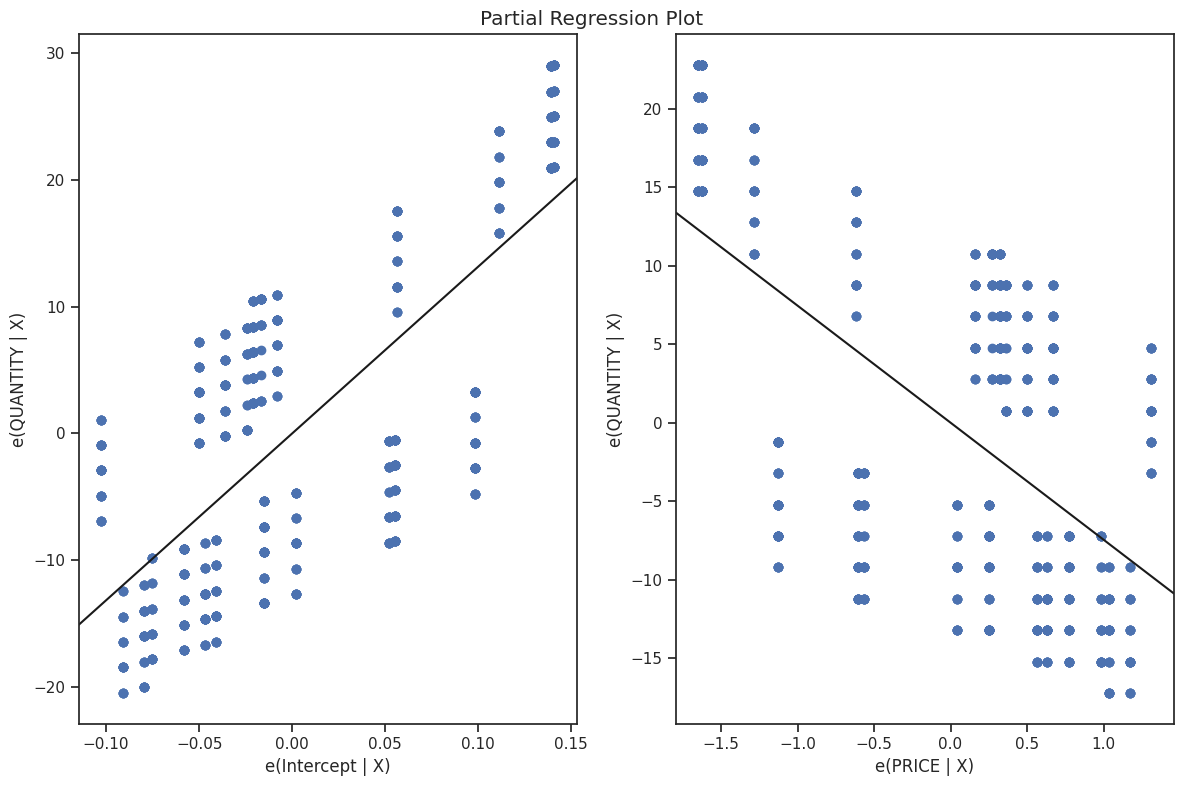

In [151]:
coke_data = bau2[(bau2['ITEM_NAME'] == 'COKE')]

create_model_and_find_elasticities(coke_data)


2 is for combo.  
1  is for single
Its likey that the bottom distibution belongs to single purchases of coke

In [130]:
coke_data = bau2[(bau2['ITEM_NAME'] == 'COKE') & (bau2['SELL_ID'] == 3057)]
elasticities['coke_3057'] = create_model_and_find_elasticities(coke_data)

ValueError: zero-size array to reduction operation maximum which has no identity

theres is no order for single coke

In [152]:
# Print unique values for 'ITEM_NAME'
print(bau2['ITEM_NAME'].unique())

# Print unique values for 'SELL_ID'
print(bau2['SELL_ID'].unique())

['BURGER' 'COKE' 'LEMONADE' 'COFFEE']
[1070 2051 2052 2053]


Price elasticity of the product: -6.164156666230162
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1784.
Date:                Tue, 17 Sep 2024   Prob (F-statistic):          3.72e-152
Time:                        20:52:21   Log-Likelihood:                -1035.7
No. Observations:                 416   AIC:                             2075.
Df Residuals:                     414   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


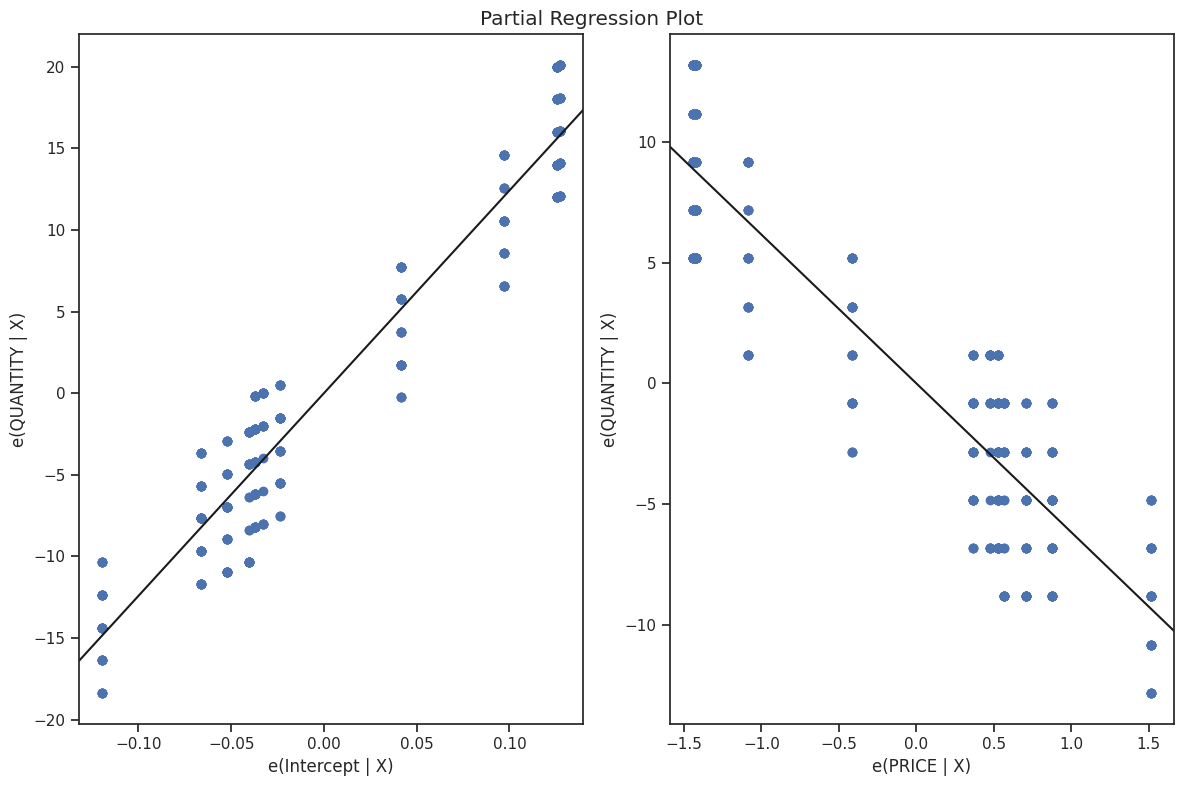

In [153]:
coke_date =bau2[(bau2['ITEM_NAME'] == 'COKE') & (bau2['SELL_ID'] == 2053)]
elasticities['coke_2053'] = create_model_and_find_elasticities(coke_date)

Price elasticity of the product: -3.618990615456309
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     363.3
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           1.34e-58
Time:                        21:04:38   Log-Likelihood:                -1021.5
No. Observations:                 416   AIC:                             2047.
Df Residuals:                     414   BIC:                             2055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


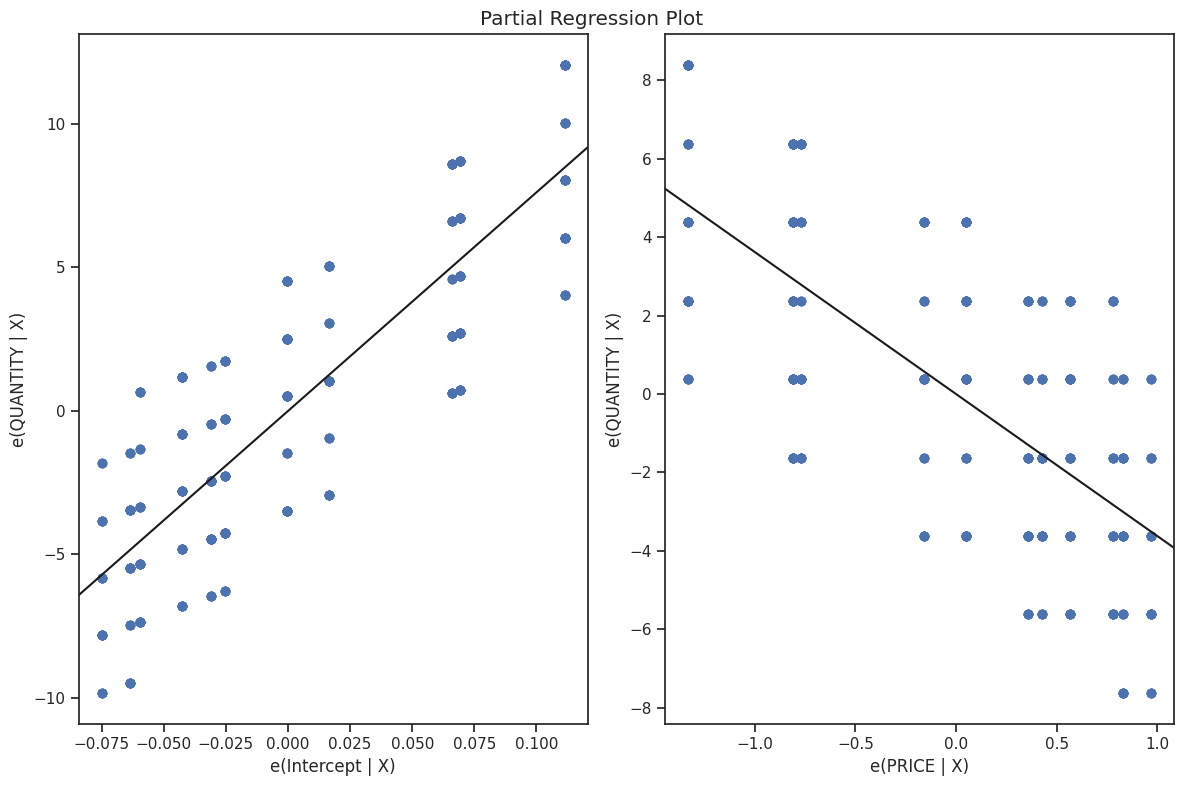

In [168]:
coke_data =bau2[(bau2['ITEM_NAME'] == 'COKE') & (bau2['SELL_ID'] == 2051)]
elasticities['coke_2051'], model_coke_2051 = create_model_and_find_elasticities(coke_date)

Look at Coffe and Lemonade

Price elasticity of the product: -2.8567029845599605
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     316.5
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           5.32e-53
Time:                        20:52:31   Log-Likelihood:                -1014.7
No. Observations:                 416   AIC:                             2033.
Df Residuals:                     414   BIC:                             2041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

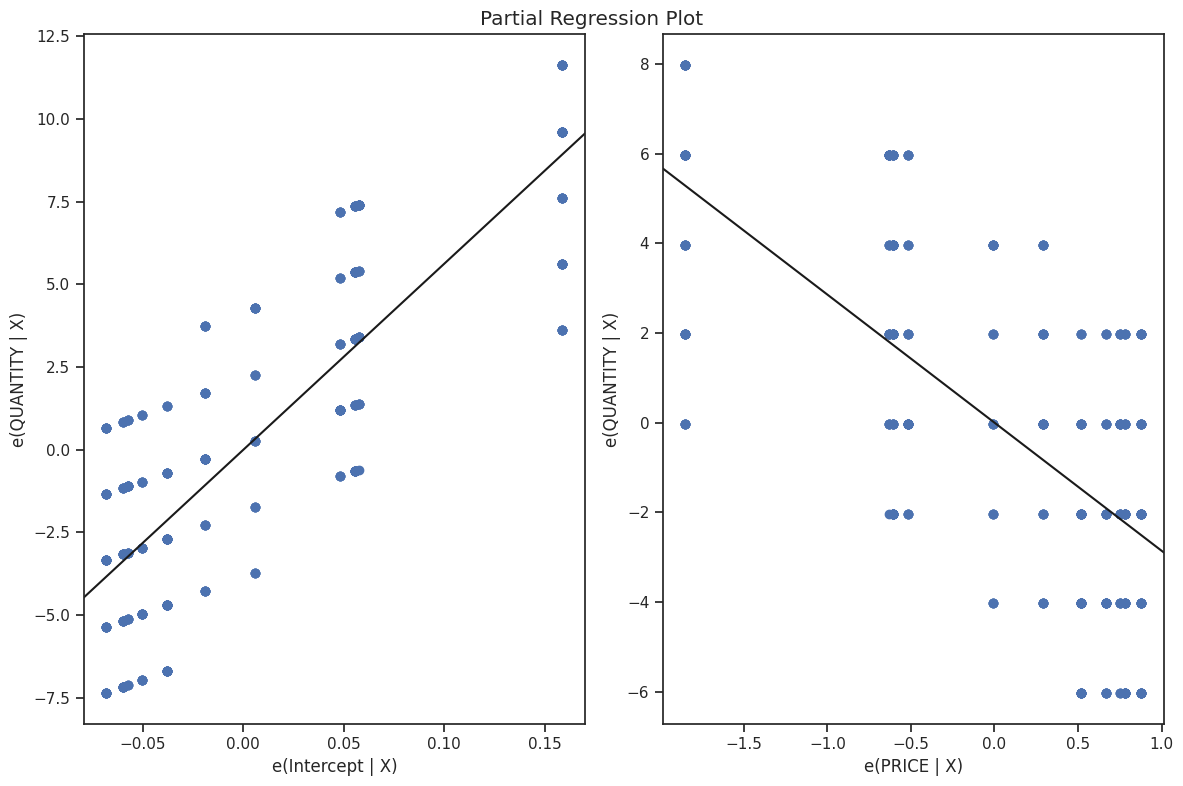

In [155]:
lemenade_data = bau2[(bau2['ITEM_NAME'] == 'LEMONADE') & (bau2['SELL_ID'] == 2052)]
elasticities['lemenade_2052'] = create_model_and_find_elasticities(lemenade_data)

Price elasticity of the product: -2.85

R-squared: 0.43

In [136]:
lemenade_data = bau2[(bau2['ITEM_NAME'] == 'LEMONADE') & (bau2['SELL_ID'] == 2053)]
elasticities['lemenade_2053'] = create_model_and_find_elasticities(lemenade_data)

ValueError: zero-size array to reduction operation maximum which has no identity

no result for this id

In [137]:
lemenade_data = bau2[(bau2['ITEM_NAME'] == 'LEMONADE') & (bau2['SELL_ID'] == 3055)]
elasticities['lemenade_3055'] = create_model_and_find_elasticities(lemenade_data)

ValueError: zero-size array to reduction operation maximum which has no identity

no result with this id for lemonade

In [138]:
coffe_date = bau2[(bau2['ITEM_NAME'] == 'COFFEE') & (bau2['SELL_ID'] == 2052)]
elasticities['lemenade_2052'] = create_model_and_find_elasticities(lemenade_data)

ValueError: zero-size array to reduction operation maximum which has no identity

In [143]:
coffe_date = bau2[(bau2['ITEM_NAME'] == 'COFFEE') & (bau2['SELL_ID'] == 2053)]
elasticities['coffee_253'] = create_model_and_find_elasticities(lemenade_data)

ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
coffe_date = bau2[(bau2['ITEM_NAME'] == 'COFFEE') & (bau2['SELL_ID'] == 2052)]
elasticities['lemenade_2052'] = create_model_and_find_elasticities(lemenade_data)

In [140]:
coffe_date = bau2[(bau2['ITEM_NAME'] == 'COFFEE') & (bau2['SELL_ID'] == 3055)]
elasticities['lemenade_3055'] = create_model_and_find_elasticities(lemenade_data)

ValueError: zero-size array to reduction operation maximum which has no identity

**List in a table the items and their price elasticities**

In [189]:
elasticities

{'BURGER': -6.164156666230162,
 'burger_2052': (-3.618990615456309,
  <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7d6475184e80>),
 'burger_2053': (-6.164156666230162,
  <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7d6477e7abc0>),
 'COKE': -3.618990615456309,
 'coke_2053': (-6.164156666230162,
  <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7d647070f910>),
 'coke_2051': -3.618990615456309,
 'LEMONADE': -2.8567029845599605,
 'lemenade_2052': (-2.8567029845599605,
  <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7d646e6413c0>),
 'burger_1070': (-8.658581488470567,
  <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7d64757271c0>)}

**Find the price for optimal profit**



In [157]:
coke_data.PRICE.min()

10.45

In [158]:
coke_data.PRICE.max()

13.41

In [159]:
# set the price of coke to 9
buying_price_coke = 9



cokeData. profit = (cokadataDateP.Price -buyingPriceCoke) * cokedata.Quantity



In [161]:
start_price = 9.5
end_price = 15

In [163]:
test = pd.DataFrame(columns=['PRICE', 'QUANTITY'])

In [164]:
test['PRICE'] = np.arange(start_price, end_price, 0.1)

In [169]:
test['QUANTITY'] = model_coke_2051.predict(test['PRICE'])

In [170]:
test

PRICE   QUANTITY
0     9.5  41.759021
1     9.6  41.397122
2     9.7  41.035223
3     9.8  40.673324
4     9.9  40.311424
5    10.0  39.949525
6    10.1  39.587626
7    10.2  39.225727
8    10.3  38.863828
9    10.4  38.501929
10   10.5  38.140030
11   10.6  37.778131
12   10.7  37.416232
13   10.8  37.054333
14   10.9  36.692434
15   11.0  36.330535
16   11.1  35.968636
17   11.2  35.606737
18   11.3  35.244838
19   11.4  34.882939
20   11.5  34.521039
21   11.6  34.159140
22   11.7  33.797241
23   11.8  33.435342
24   11.9  33.073443
25   12.0  32.711544
26   12.1  32.349645
27   12.2  31.987746
28   12.3  31.625847
29   12.4  31.263948
30   12.5  30.902049
31   12.6  30.540150
32   12.7  30.178251
33   12.8  29.816352
34   12.9  29.454453
35   13.0  29.092554
36   13.1  28.730654
37   13.2  28.368755
38   13.3  28.006856
39   13.4  27.644957
40   13.5  27.283058
41   13.6  26.921159
42   13.7  26.559260
43   13.8  26.197361
44   13.9  25.835462
45   14.0  25.473563
46   14.1  25.111664
47   14.2  24.749765
48   14.3  24.387866
49   14.4  24.025967
50   14.5  23.664068
51   14.6  23.302169
52   14.7  22.940270
53   14.8  22.578370
54   14.9  22.216471

In [171]:
test['PROFIT'] = (test['PRICE'] - buying_price_coke) * test['QUANTITY']

In [172]:
test

PRICE   QUANTITY      PROFIT
0     9.5  41.759021   20.879510
1     9.6  41.397122   24.838273
2     9.7  41.035223   28.724656
3     9.8  40.673324   32.538659
4     9.9  40.311424   36.280282
5    10.0  39.949525   39.949525
6    10.1  39.587626   43.546389
7    10.2  39.225727   47.070873
8    10.3  38.863828   50.522977
9    10.4  38.501929   53.902701
10   10.5  38.140030   57.210045
11   10.6  37.778131   60.445010
12   10.7  37.416232   63.607594
13   10.8  37.054333   66.697799
14   10.9  36.692434   69.715624
15   11.0  36.330535   72.661070
16   11.1  35.968636   75.534135
17   11.2  35.606737   78.334821
18   11.3  35.244838   81.063126
19   11.4  34.882939   83.719052
20   11.5  34.521039   86.302599
21   11.6  34.159140   88.813765
22   11.7  33.797241   91.252552
23   11.8  33.435342   93.618958
24   11.9  33.073443   95.912985
25   12.0  32.711544   98.134632
26   12.1  32.349645  100.283900
27   12.2  31.987746  102.360787
28   12.3  31.625847  104.365295
29   12.4  31.263948  106.297423
30   12.5  30.902049  108.157171
31   12.6  30.540150  109.944539
32   12.7  30.178251  111.659528
33   12.8  29.816352  113.302136
34   12.9  29.454453  114.872365
35   13.0  29.092554  116.370214
36   13.1  28.730654  117.795683
37   13.2  28.368755  119.148773
38   13.3  28.006856  120.429482
39   13.4  27.644957  121.637812
40   13.5  27.283058  122.773762
41   13.6  26.921159  123.837332
42   13.7  26.559260  124.828523
43   13.8  26.197361  125.747333
44   13.9  25.835462  126.593764
45   14.0  25.473563  127.367815
46   14.1  25.111664  128.069486
47   14.2  24.749765  128.698777
48   14.3  24.387866  129.255688
49   14.4  24.025967  129.740220
50   14.5  23.664068  130.152372
51   14.6  23.302169  130.492144
52   14.7  22.940270  130.759536
53   14.8  22.578370  130.954549
54   14.9  22.216471  131.077181

Text(0.5, 1.0, 'Relationship Between Price, Quantity, and Profit')

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Quantity / Profit')

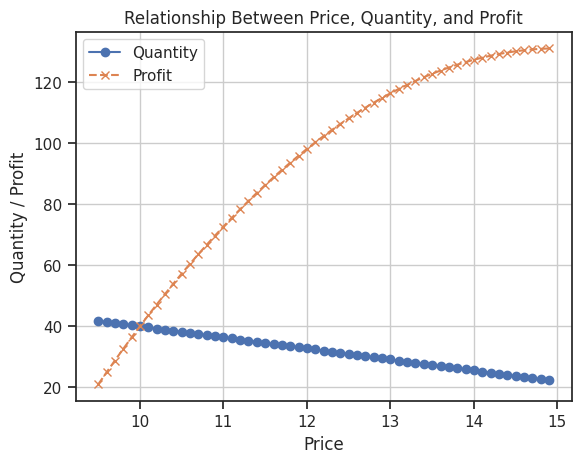

In [174]:
import matplotlib.pyplot as plt

# Plotting the data
plt.plot(test['PRICE'], test['QUANTITY'], label='Quantity', linestyle='-', marker='o')
plt.plot(test['PRICE'], test['PROFIT'], label='Profit', linestyle='--', marker='x')

# Adding a title
plt.title('Relationship Between Price, Quantity, and Profit')

# Adding axis labels
plt.xlabel('Price')
plt.ylabel('Quantity / Profit')

# Adding a legend to distinguish the lines
plt.legend()

# Adding a grid for easier interpretation
plt.grid(True)

# Display


**Insights**

Quantity vs. Price:

The blue line shows that as the price increases, the quantity demanded decreases. This aligns with the basic economic principle of the law of demand, indicating that higher prices result in lower demand.

Profit vs. Price:

 The orange line suggests that profit initially increases as the price increases but eventually starts to plateau or slow down in its growth. This trend could suggest that beyond a certain price point, the profit growth diminishes, likely due to reduced demand outweighing the benefit of higher prices.

In [175]:
ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]

In [177]:
test.loc[[ind]]

PRICE   QUANTITY      PROFIT
54   14.9  22.216471  131.077181

**Insights With coke BAU**

At the maximum profit of **131.08**, the price is set at **14.9**, and the quantity demanded is **22.22** units. This indicates that the optimal price point to achieve maximum profit is relatively high, even though the demand is lower.


For the cafe's inventory management, stocking 22 units of Coke is recommended. Twenty 22 cokes aligns with the maximum profit scenario, ensuring that supply meets demand at the optimal price point, minimizing overstock while maximizing profitability.

In [180]:
# making a funciton
# making a funciton
def find_optimal_price(data, model, buying_price):
  start_price = data.PRICE.min() -1
  end_price = data.PRICE.min() +10
  test = pd.DataFrame(columns=['PRICE', 'QUANTITY'])
  test['PRICE'] = np.arange(start_price, end_price, 0.1)
  test['QUANTITY'] = model.predict(test['PRICE']) # this line was incorrectly indented
  test['PROFIT'] = (test['PRICE'] - buying_price) * test['QUANTITY']
  plt.plot(test['PRICE'], test['QUANTITY'])
  plt.plot(test['PRICE'], test['PROFIT'])
  plt.show()
  ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]
  values_at_max_profit = test.loc[[ind]]
  return values_at_max_profit

### Calculate the optimal price fo rall and list the table


In [190]:
optimal_price = {}
buying_price = 9


In [188]:

optimal_price['burger_1070'] = find_optimal_price(burger_1070bau, model_burger_1070, buying_price_burger)

NameError: name 'model_burger_1070' is not defined